In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn
from sklearn.linear_model import LinearRegression

# Xử lý text
from wordcloud import WordCloud
import re
import string


## Câu hỏi ý nghĩa (Meaningful questions)

**Câu hỏi 1: Xu hướng qua thời gian của các features quan trọng trong data là gì? (budget, revenue, runtime, vote_average)\
Câu hỏi 2: Có mối tương quan nào giữa điểm rating và các trường khác không?\
Câu hỏi 3: Thể loại phim nào hoặc sự kết hợp của các thể loại phim nào có tỷ lệ cao hơn (phổ biến hơn) qua các năm?\
Câu hỏi 4: Mối tương quan giữa các đặc trưng (features) của top các thể loại phổ biến là gì?\
Câu hỏi 5: Điểm Rating so với Tổng số phim đã đạo diễn của mỗi đạo diễn là bao nhiêu? Có mối tương quan nào giữa chúng không?\
Câu hỏi 6: Tỷ suất lợi nhuận (ROI = Revenue / Budget) ảnh hưởng thế nào đến Rating?**

# EDA

# 1. Explore Data

In [6]:
current_path = os.getcwd()
parent = os.path.dirname(current_path)
print(parent)
train_file_name = 'train_raw.csv'
test_file_name = 'test_raw.csv'
train_path = os.path.join(parent, 'data/cleaned', train_file_name)
test_path = os.path.join(parent, 'data/cleaned', test_file_name)
print(train_path)
print(test_path)

d:\Vscode\Self\Data Science\Book Notes\IntroDS\Final Project github\Intro2DS
d:\Vscode\Self\Data Science\Book Notes\IntroDS\Final Project github\Intro2DS\data/cleaned\train_raw.csv
d:\Vscode\Self\Data Science\Book Notes\IntroDS\Final Project github\Intro2DS\data/cleaned\test_raw.csv


In [7]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

budget                                          cast_top5  \
0  2.000000e+06  Ethan Hawke,Julie Delpy,Wiley Wiggins,Bill Wis...   
1  3.000000e+06  Erkan Kolçak Köstendil,Ali Atay,Şebnem Bozoklu...   
2  4.000000e+06  Dennis Hopper,Asia Argento,Helen Shaver,Lochly...   
3  1.050910e+07  Jimmy Bennett,Adam Taylor Gordon,Ashley Rose O...   
4  6.300000e+05  John Schneider,Luke Benjamin Bernard,Matthew F...   

  certification_US  collection_id                       directors  \
0               NR           -1.0               Richard Linklater   
1               NR           -1.0                       Can Ulkay   
2                R           -1.0                      Paul Lynch   
3                G           -1.0  Larry Leichliter,Bill Melendez   
4            PG-13           -1.0                   Curtis Graham   

                             genres  \
0           Animation,Drama,Fantasy   
1                 History,Drama,War   
2              Crime,Drama,Thriller   
3  Animation,Comedy,Family,TV Movie   
4                             Drama   

                                            keywords original_language  \
0  dreams,philosophy,parallel world,existence,adu...                en   
1  world war i,ice cream,gallipoli campaign,broke...                tr   
2  kidnapping,hostage,psychopath,deputy sheriff,s...                en   
3                                        holiday,dog                en   
4                                            Unknown                en   

                              original_title  \
0                                Waking Life   
1                          Türk İşi Dondurma   
2                                 The Keeper   
3  I Want a Dog for Christmas, Charlie Brown   
4                               The Favorite   

                                            overview  ...  \
0  Waking Life is about a young man in a persiste...  ...   
1  In 1915, two Turks in Australia make a living ...  ...   
2  When an apparently exemplary cop abducts and s...  ...   
3  Linus and Lucy's younger brother Rerun wants a...  ...   
4  Inspired by the true events of Luke Benjamin B...  ...   

                                production_companies production_countries  \
0  IFC Productions,Thousand Words,Detour Filmprod...                   US   
1                                   Dijital Sanatlar                   TR   
2                                   Peace Arch Films                GB,CA   
3  Lee Mendelson Film Productions,Charles M. Schu...                   US   
4                                            Unknown                   US   

  release_date     revenue  runtime  spoken_languages  \
0   2001-10-19   3176880.0    101.0                en   
1   2019-03-15   1289283.0    120.0             tr,en   
2   2004-05-14     73788.0     95.0                en   
3   2003-12-09         0.0     49.0                en   
4   2019-09-13  36800000.0    108.0                en   

                                             tagline  \
0  Dreams. What are they? An escape from reality ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  One brother fights for his life, the other fig...   

                                       title vote_count  vote_average  
0                                Waking Life        914         7.470  
1                          Turkish Ice Cream         42         5.900  
2                                 The Keeper         32         4.375  
3  I Want a Dog for Christmas, Charlie Brown         55         5.845  
4                               The Favorite          2         6.000  

[5 rows x 21 columns]

In [8]:
train_df.tail()

budget                                          cast_top5  \
7995  9.400000e+07  Richard Harmon,Sara Thompson,Marina Stephenson...   
7996  6.537607e+06  Ana Polvorosa,Carmen Machi,Macarena Gómez,Cand...   
7997  1.620326e+06  Jella Haase,Matthias Schweighöfer,Marc Benjami...   
7998  2.626161e+06  Julio Torres,Emma Stone,Ryan Gosling,Lin-Manue...   
7999  1.500000e+06  Mehmet Ali Erbil,Cem Davran,Ayşegül Aldinç,Nur...   

     certification_US  collection_id         directors  \
7995               NR           -1.0          BJ Verot   
7996               NR           -1.0  Eduardo Casanova   
7997               NR           -1.0      Florian Ross   
7998               NR           -1.0       Dave McCary   
7999               NR           -1.0        Gani Müjde   

                      genres                 keywords original_language  \
7995  Horror,Science Fiction                  Unknown                en   
7996    Drama,Comedy,Fantasy     dark comedy,disabled                es   
7997            Comedy,Drama  road trip,coming of age                de   
7998         Comedy,TV Movie                  Unknown                en   
7999          Comedy,History                  Unknown                tr   

                          original_title  \
7995                          The Return   
7996                              Pieles   
7997                        Vielmachglas   
7998  My Favorite Shapes by Julio Torres   
7999                        Kahpe Bizans   

                                               overview  ...  \
7995  After the death of his father, a brilliant col...  ...   
7996  In a strange world where people share numerous...  ...   
7997  Marleen is in her early 20s, works in a movie ...  ...   
7998  In this multimedia comedy show, Torres explore...  ...   
7999  Kahpe Bizans tells us the story of Yetis Bey (...  ...   

                                   production_companies production_countries  \
7995                                     Strata Studios                   CA   
7996  Pokeepsie Films,Nadie es Perfecto,The Other Si...                   ES   
7997  Warner Bros. Entertainment Germany,Pantaleon F...                   DE   
7998                                                A24                   US   
7999            Özen Film,Tükenmez Kalem Film,Arzu Film                   TR   

     release_date       revenue  runtime  spoken_languages  \
7995   2020-09-05  1.138000e+09     90.0                en   
7996   2017-06-09  9.295000e+04     78.0                es   
7997   2018-03-08  8.087480e+05     95.0                de   
7998   2019-08-10  0.000000e+00     57.0                en   
7999   2000-01-21  2.500000e+06     97.0                tr   

                          tagline                               title  \
7995  Childhood horrors can kill.                          The Return   
7996                          NaN                               Skins   
7997                          NaN                        Vielmachglas   
7998                          NaN  My Favorite Shapes by Julio Torres   
7999                          NaN                Perfidious Byzantine   

     vote_count  vote_average  
7995        317         6.661  
7996        554         6.394  
7997         51         5.900  
7998         19         7.100  
7999         65         5.300  

[5 rows x 21 columns]

In [9]:
train_df.columns

Index(['budget', 'cast_top5', 'certification_US', 'collection_id', 'directors',
       'genres', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'title', 'vote_count', 'vote_average'],
      dtype='object')

In [10]:
train_df.isnull().sum()

budget                     0
cast_top5                  0
certification_US           0
collection_id              0
directors                  0
genres                     0
keywords                   0
original_language          0
original_title             0
overview                  68
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
tagline                 3579
title                      0
vote_count                 0
vote_average               0
dtype: int64

Nhận xét: trong overview (text data) có 68 giá trị bằng NaN và tagline (text data) có 3579 giá trị bằng NaN\
Cách xử lý:
* Xử lý bằng cách đặt [NO_TAGLINE] cho tagline và [NO_OVERVIEW_PROVIDED] cho overview
* Có thể loại bỏ những dòng có overview bằng NaN vì cũng khá ít. 

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                8000 non-null   float64
 1   cast_top5             8000 non-null   object 
 2   certification_US      8000 non-null   object 
 3   collection_id         8000 non-null   float64
 4   directors             8000 non-null   object 
 5   genres                8000 non-null   object 
 6   keywords              8000 non-null   object 
 7   original_language     8000 non-null   object 
 8   original_title        8000 non-null   object 
 9   overview              7932 non-null   object 
 10  popularity            8000 non-null   float64
 11  production_companies  8000 non-null   object 
 12  production_countries  8000 non-null   object 
 13  release_date          8000 non-null   object 
 14  revenue               8000 non-null   float64
 15  runtime              

In [12]:
train_df.describe()

budget  collection_id   popularity       revenue      runtime  \
count  8.000000e+03   8.000000e+03  8000.000000  8.000000e+03  8000.000000   
mean   1.992720e+07   6.960302e+04     4.296986  1.675578e+08    94.746509   
std    1.871729e+08   2.334872e+05     3.117167  5.943763e+09    32.536819   
min    1.000000e+00  -1.000000e+00     0.000000  0.000000e+00     1.000000   
25%    1.000000e+06  -1.000000e+00     2.098200  0.000000e+00    86.000000   
50%    5.156075e+06  -1.000000e+00     4.383950  1.385420e+05    95.000000   
75%    1.300000e+07  -1.000000e+00     5.635950  1.600000e+07   108.000000   
max    1.500000e+10   1.567895e+06   119.399700  3.770000e+11  1265.000000   

         vote_count  vote_average  
count   8000.000000   8000.000000  
mean     711.492750      5.877771  
std     2198.493433      1.514090  
min        0.000000      0.500000  
25%        7.000000      5.100000  
50%       41.000000      6.000000  
75%      352.000000      6.800000  
max    32084.000000     10.000000

### a. Khai báo hàm vẽ biểu đồ

In [13]:
def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_numerical_distribution(df, column, bins=30):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

def plot_scatter(df, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.title(f'Scatter Plot of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def plot_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)

    plt.figure(figsize=(10, 6))
    missing_values.plot.bar()
    plt.title('Missing Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.show()


def plot_trend_line(df, x_column, y_column):
    """
    Vẽ line plot đơn giản theo xu hướng tháng:
    - Chuyển thời gian về monthly bucket (năm-tháng).
    - Tổng hợp theo tháng: nếu y là 'budget' dùng sum, ngược lại dùng mean.
    - Thêm đường rolling mean (cửa sổ 12 tháng) để thể hiện trend.
    """
    dfx = df.copy()
    dfx[x_column] = pd.to_datetime(dfx[x_column], errors='coerce')
    dfx = dfx.dropna(subset=[x_column, y_column])

    dfx['year_month'] = dfx[x_column].dt.to_period('M').dt.to_timestamp()

    numerical_cols = ['budget', 'revenue', 'vote_average', 'vote_count', 'runtime', 'popularity']
    if y_column.lower() in numerical_cols:
        monthly_series = dfx.groupby('year_month')[y_column].sum().sort_index()
    else:
        monthly_series = dfx.groupby('year_month')[y_column].mean().sort_index()

    trend = monthly_series.rolling(window=12, min_periods=3).mean()

    # Vẽ
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_series.index, monthly_series.values, alpha=0.4, label=y_column.capitalize())
    plt.plot(trend.index, trend.values, color='red', linewidth=2, label='Rolling mean')
    plt.title(f'Trend of {y_column}')
    plt.xlabel('Year-Month')
    plt.ylabel(y_column)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_trend_line_log(df, x_column, y_column):
    """
    Vẽ line plot theo xu hướng tháng với log scale:
    - Chuyển thời gian về monthly bucket (năm-tháng).
    - Tổng hợp theo tháng: nếu y là 'budget' dùng sum, ngược lại dùng mean.
    - Thêm đường rolling mean (cửa sổ 12 tháng) để thể hiện trend.
    - Y-axis dùng log scale với đơn vị gốc để dễ đọc.
    """
    dfx = df.copy()
    dfx[x_column] = pd.to_datetime(dfx[x_column], errors='coerce')
    dfx = dfx.dropna(subset=[x_column, y_column])    
    dfx['year_month'] = dfx[x_column].dt.to_period('M').dt.to_timestamp()

    numerical_cols = ['budget', 'revenue', 'vote_average', 'vote_count', 'runtime', 'popularity']
    if y_column.lower() in numerical_cols:
        monthly_series = dfx.groupby('year_month')[y_column].sum().sort_index()
    else:
        monthly_series = dfx.groupby('year_month')[y_column].mean().sort_index()
    
    full_date_range = pd.date_range(start=monthly_series.index.min(), 
                                     end=monthly_series.index.max(), 
                                     freq='MS')
    monthly_series = monthly_series.reindex(full_date_range, fill_value=0)
    
    # Với log scale: dùng giá trị nhỏ thay vì 0 để tính rolling mean tốt hơn
    # Tìm giá trị nhỏ nhất > 0 để làm baseline
    min_positive = monthly_series[monthly_series > 0].min()
    epsilon = min_positive / 10 if min_positive > 0 else 1
    monthly_series_for_trend = monthly_series.replace(0, epsilon) # Thay 0 bằng epsilon (rất nhỏ) thay vì NaN
    
    # Tính rolling mean trên log scale để mượt hơn
    log_series = np.log10(monthly_series_for_trend)
    log_trend = log_series.rolling(window=12, min_periods=3, center=True).mean()
    trend = 10 ** log_trend  # Chuyển về scale gốc
    
    # Chỉ vẽ những điểm > 0
    mask = monthly_series > 0
    monthly_series_plot = monthly_series[mask]
    trend_plot = trend[mask]

    # Vẽ
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_series_plot.index, monthly_series_plot.values, alpha=0.4, label=y_column.capitalize())
    plt.plot(trend_plot.index, trend_plot.values, color='red', linewidth=2, label='Rolling mean (log scale)')
    
    # Dùng log scale cho trục y
    plt.yscale('log')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.title(f'Trend of {y_column} (Log Scale)')
    plt.xlabel('Year-Month')
    plt.ylabel(y_column.capitalize())
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


#### Demo: Vẽ biểu đồ cho multi-label columns
Các cột nhiều giá trị (list) sẽ được chuẩn hoá và `explode` để tính tần suất, sau đó vẽ Top-N.

### b. Tiền xử lý nhẹ (Light data preprocessing)

* Missing values
* Duplicates
* Outliers
* Noise


In [14]:
train_df['release_date'] = pd.to_datetime(train_df['release_date'], errors='coerce')
train_df['release_year'] = train_df['release_date'].dt.year
train_df['release_month'] = train_df['release_date'].dt.month

test_df['release_date'] = pd.to_datetime(test_df['release_date'], errors='coerce')
test_df['release_year'] = test_df['release_date'].dt.year
test_df['release_month'] = test_df['release_date'].dt.month


**Text data**\
columns:
* overview
* keywork
* title
* tagline

### c. Trực quan hóa dữ liệu (Data Visualization) 

#### **Numerical variables**

In [15]:
train_df.columns

Index(['budget', 'cast_top5', 'certification_US', 'collection_id', 'directors',
       'genres', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'title', 'vote_count', 'vote_average', 'release_year', 'release_month'],
      dtype='object')

In [16]:
numerical_cols = ['budget', 'revenue', 'vote_average', 'vote_count', 'runtime', 'popularity']


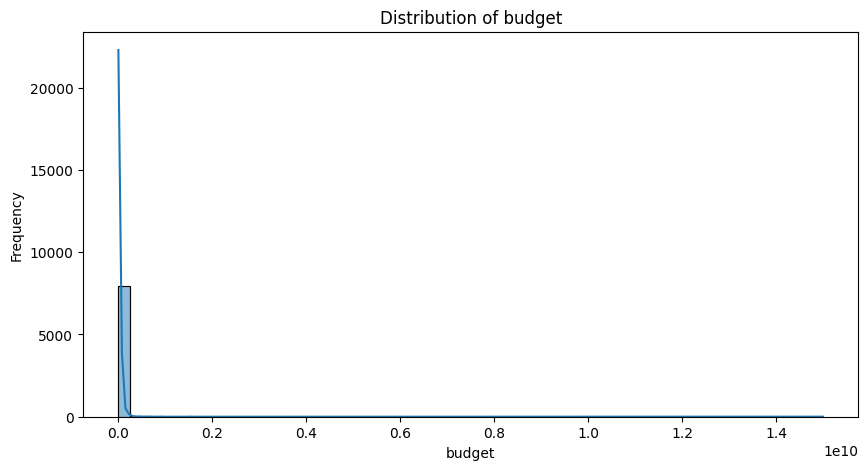

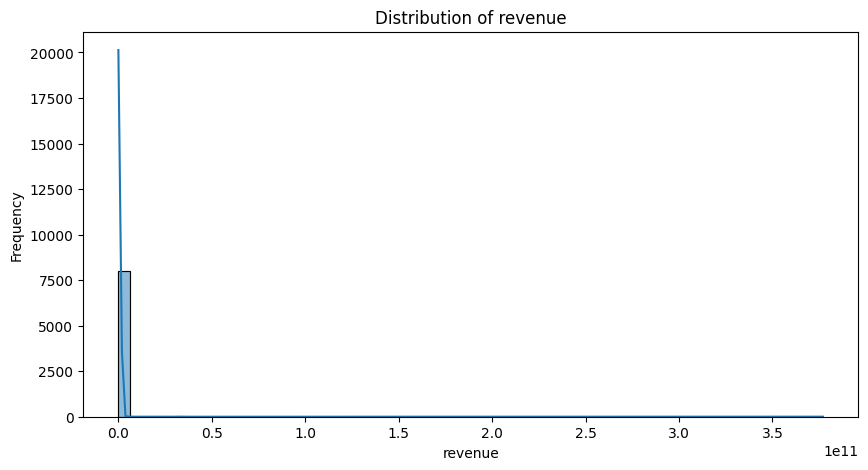

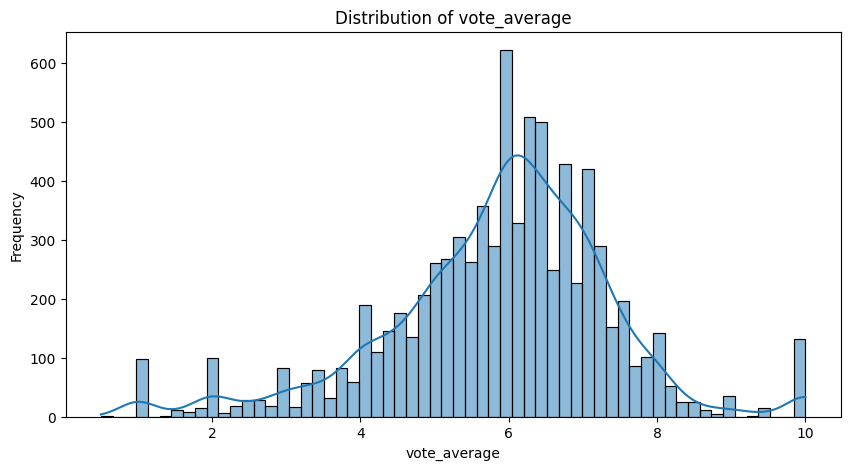

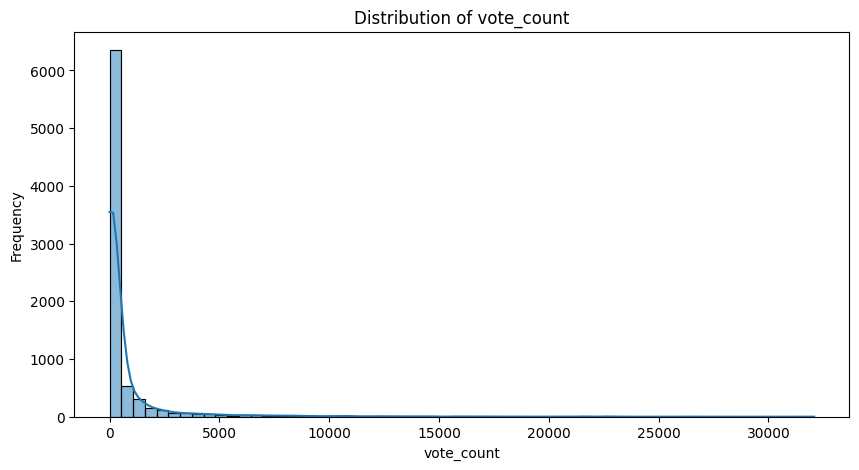

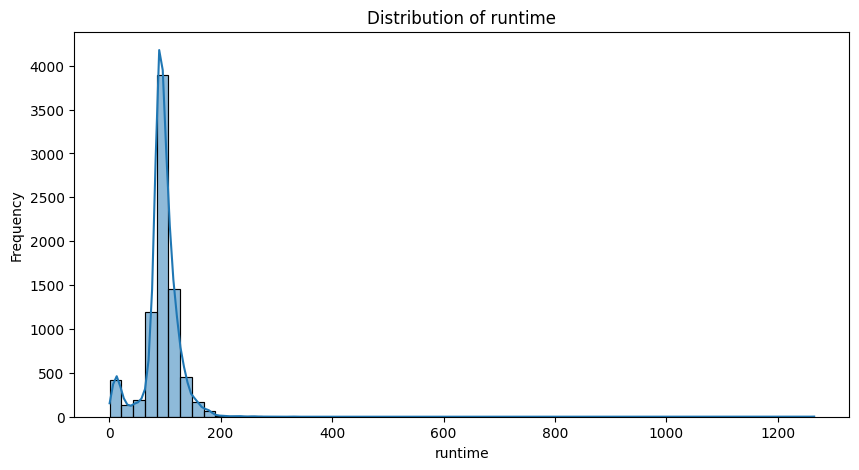

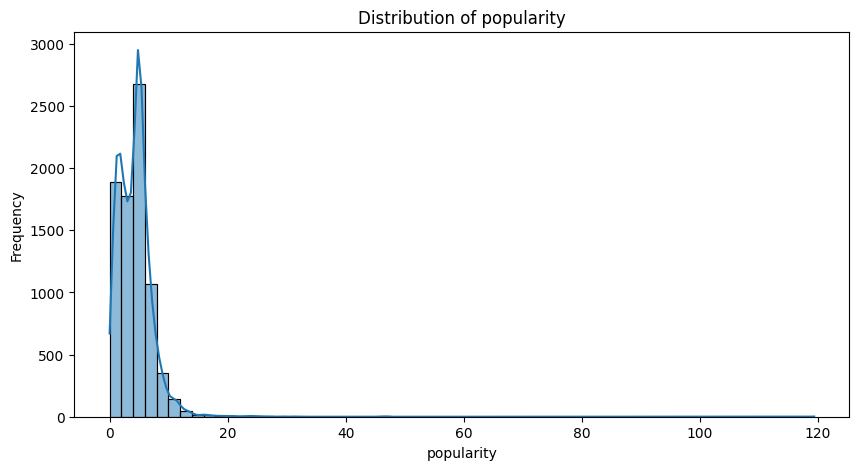

In [17]:
for col in numerical_cols:
    plot_numerical_distribution(train_df, col, bins=60)

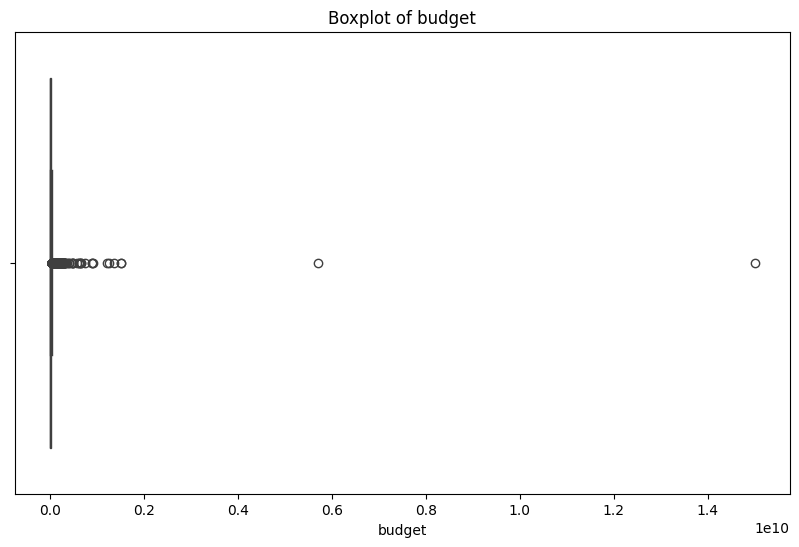

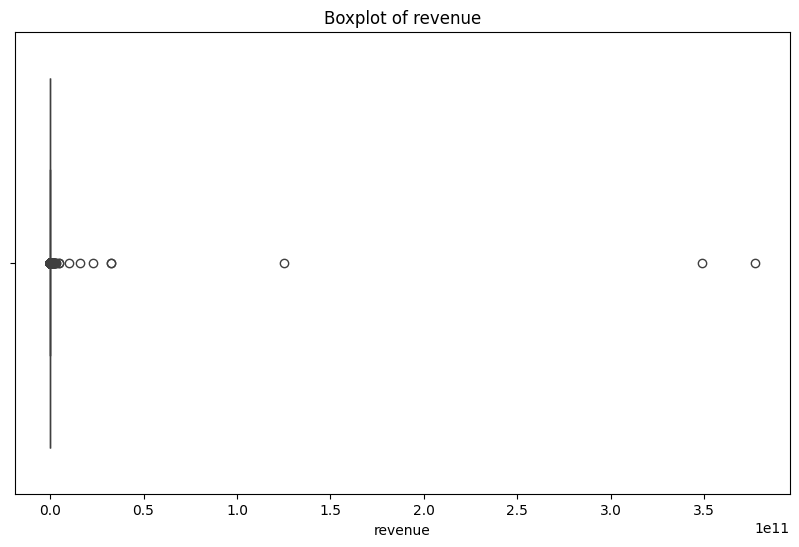

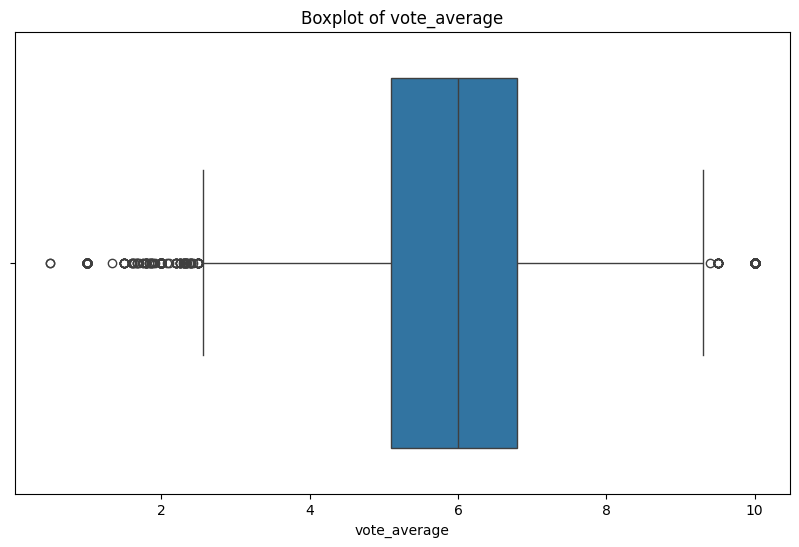

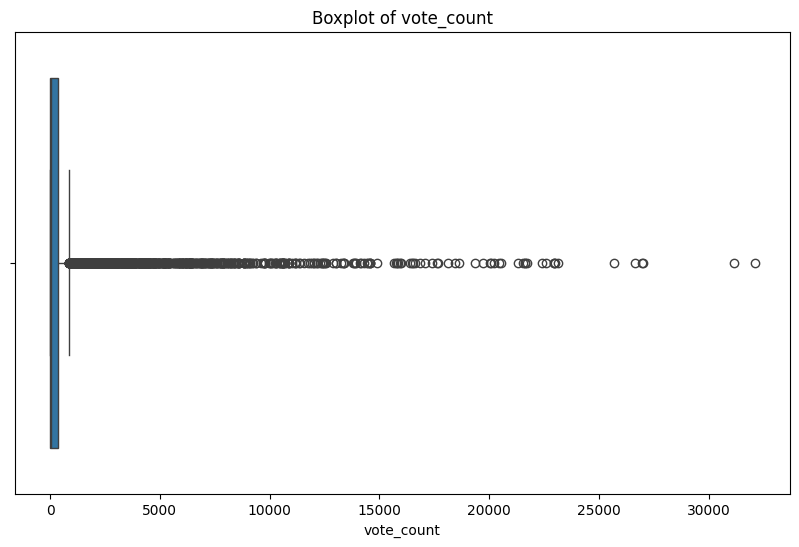

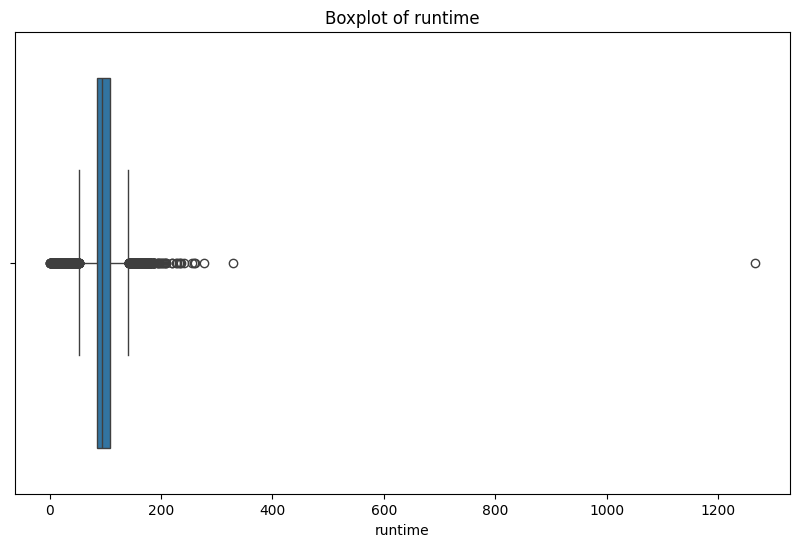

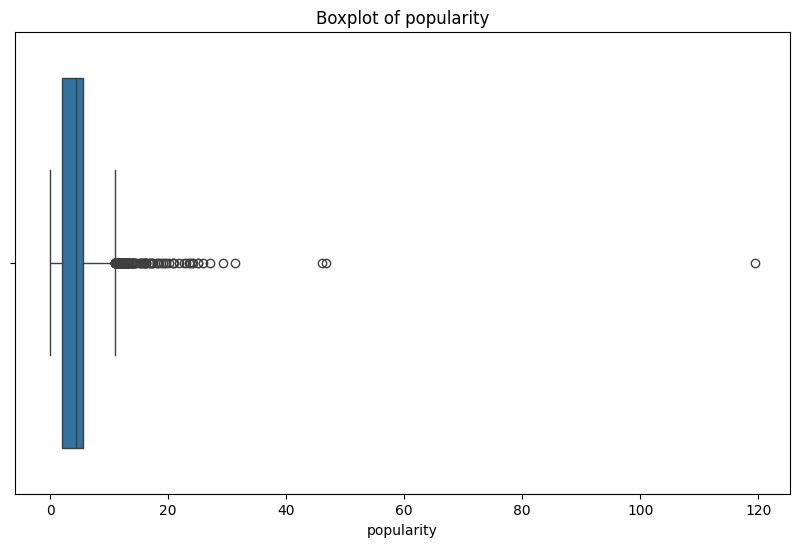

In [18]:
for col in numerical_cols:
    plot_boxplot(train_df, col)

**Nhận xét:**
* Xuất hiện outlier làm ảnh hưởng đến hình dạng của biểu đồ nên được xử lý loại bỏ
* Outlier trong budget và revenue quá nhiều -> làm biểu đồ box plot có nhiều outlier out khỏi từ vùng phân vị Q1-Q3

### Xử lý outlier
Những phương pháp xử lý outlier:
* Box Plots
* Khoảng Tứ phân vị (Interquartile Range - IQR)
    * Dùng cho data bị lệch
* Visualizing and Removing Outliers Using Scatter Plots
* Z-Score Method for Outlier Detection
    * Dùng cho data có phân phối chuẩn (Gauss)



In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Loại bỏ outliers liên tiếp cho tất cả các cột số
cleaned_train_df = train_df.copy()
for col in numerical_cols:
    cleaned_train_df = remove_outliers_iqr(cleaned_train_df, col)

cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 1 to 7999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3975 non-null   float64       
 1   cast_top5             3975 non-null   object        
 2   certification_US      3975 non-null   object        
 3   collection_id         3975 non-null   float64       
 4   directors             3975 non-null   object        
 5   genres                3975 non-null   object        
 6   keywords              3975 non-null   object        
 7   original_language     3975 non-null   object        
 8   original_title        3975 non-null   object        
 9   overview              3939 non-null   object        
 10  popularity            3975 non-null   float64       
 11  production_companies  3975 non-null   object        
 12  production_countries  3975 non-null   object        
 13  release_date          3

**Normal distribution data:**
* popularity
* runtime
* vote_average

**Skeded data:**
* budget
* revenue
* vote_count


Note: Chỉnh lại nếu có thời gian

### Phân tích outliers (điểm xa)

Trước khi vẽ, cần xử lý outliers vì chúng ảnh hưởng đến visualization và regression line. Có các phương pháp:

**1. IQR Method (Interquartile Range):**
- Loại bỏ điểm nằm ngoài Q1 - 1.5×IQR và Q3 + 1.5×IQR
- Phương pháp chuẩn, phù hợp với dữ liệu không chuẩn

**2. Z-score Method:**
- Loại bỏ điểm có |z-score| > 3 (hoặc 2.5)
- Phù hợp với dữ liệu phân phối chuẩn

**3. Percentile Method:**
- Loại bỏ top/bottom x% (ví dụ: 1%, 5%)
- Đơn giản, dễ kiểm soát

Sử dụng IQR method cho các biến số:

In [20]:
# Chỉ lấy những điểm revenue > 0
mask = cleaned_train_df['revenue'] > 0
revenue_train_df = cleaned_train_df[mask]
revenue_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 1 to 7999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                1461 non-null   float64       
 1   cast_top5             1461 non-null   object        
 2   certification_US      1461 non-null   object        
 3   collection_id         1461 non-null   float64       
 4   directors             1461 non-null   object        
 5   genres                1461 non-null   object        
 6   keywords              1461 non-null   object        
 7   original_language     1461 non-null   object        
 8   original_title        1461 non-null   object        
 9   overview              1457 non-null   object        
 10  popularity            1461 non-null   float64       
 11  production_companies  1461 non-null   object        
 12  production_countries  1461 non-null   object        
 13  release_date          1

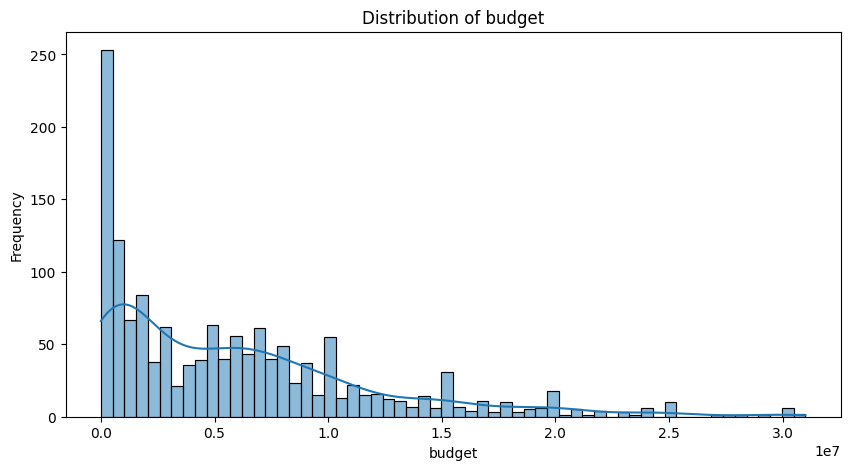

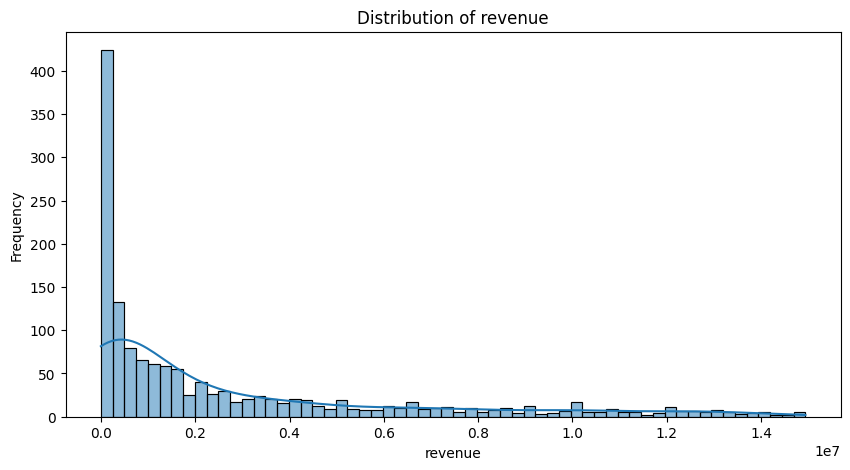

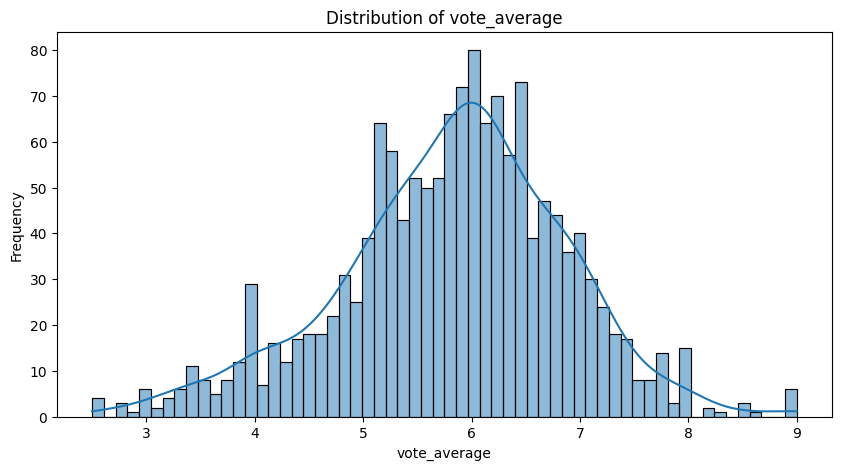

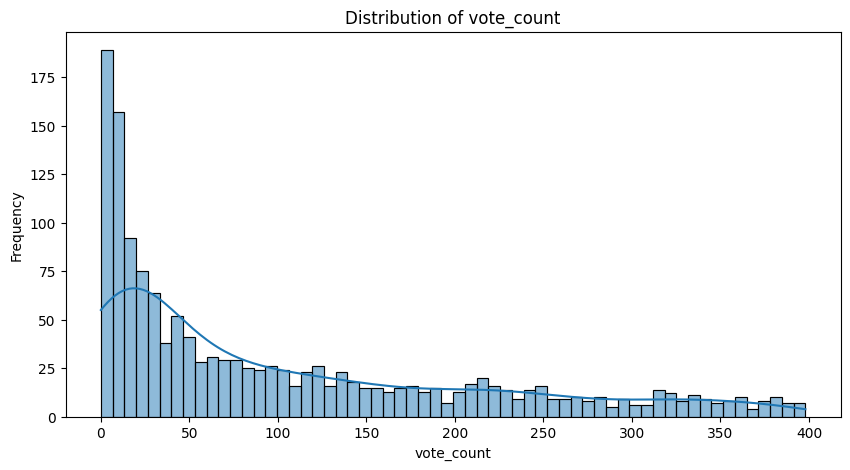

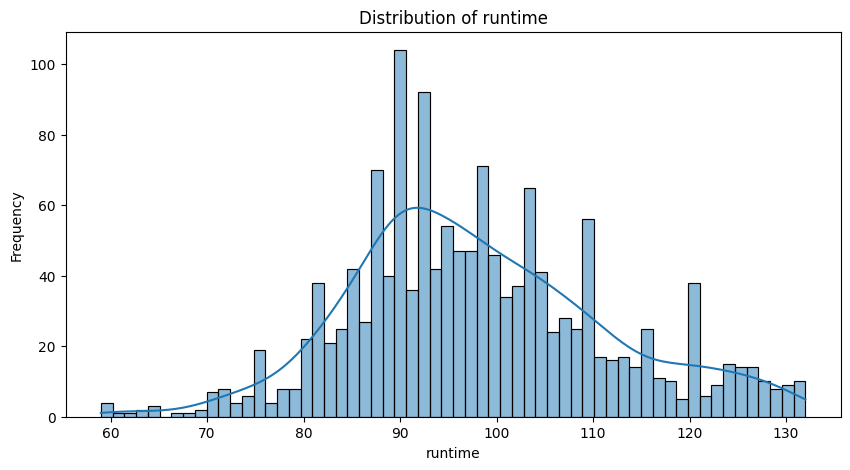

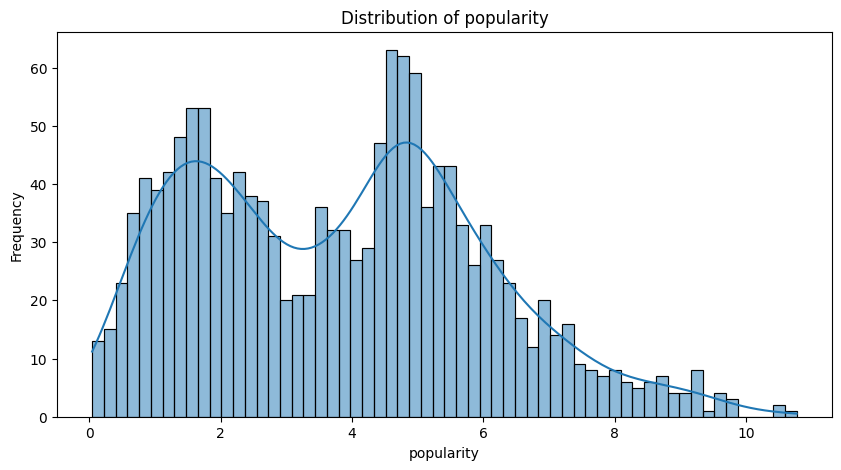

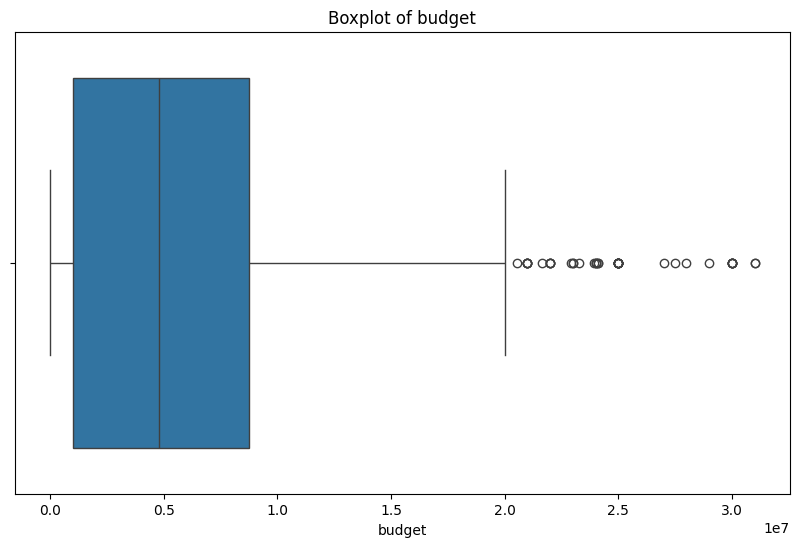

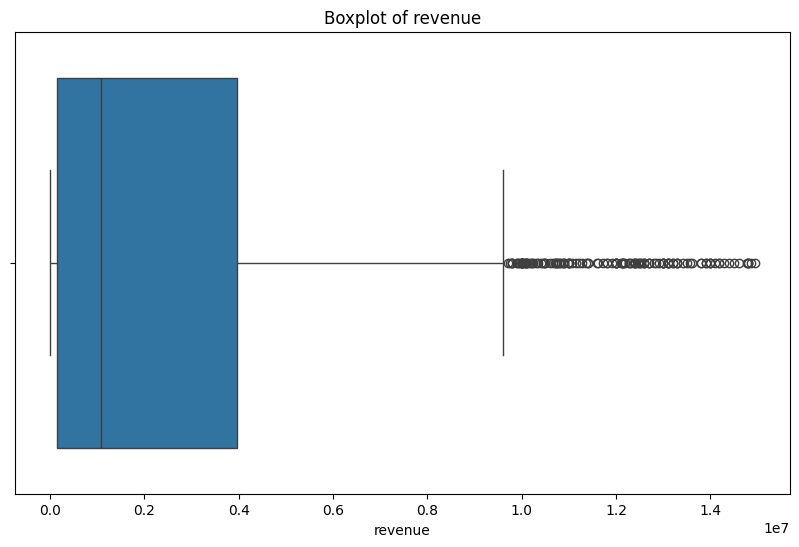

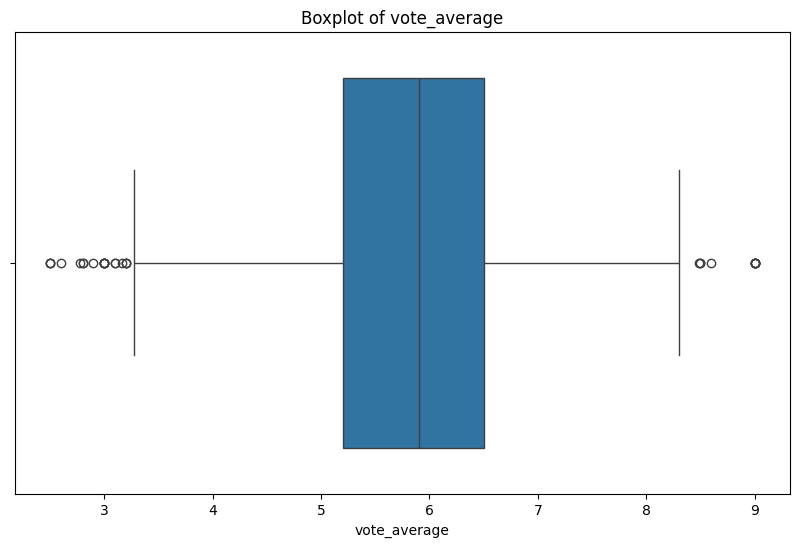

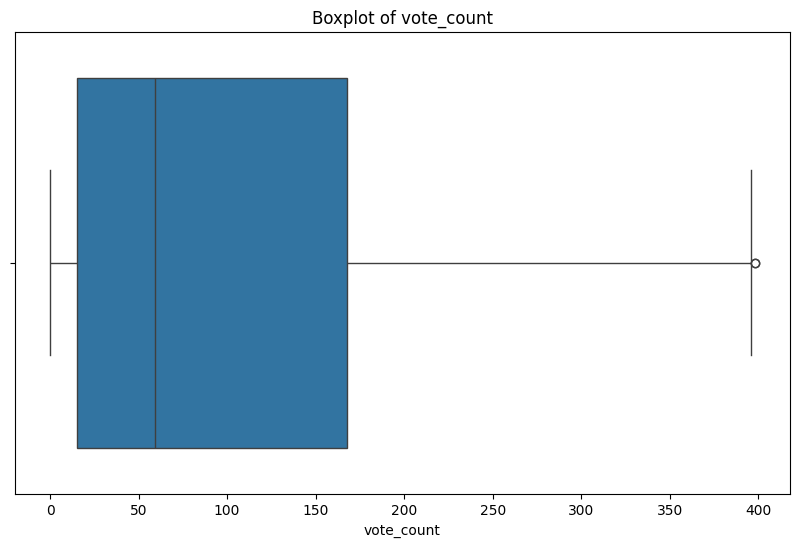

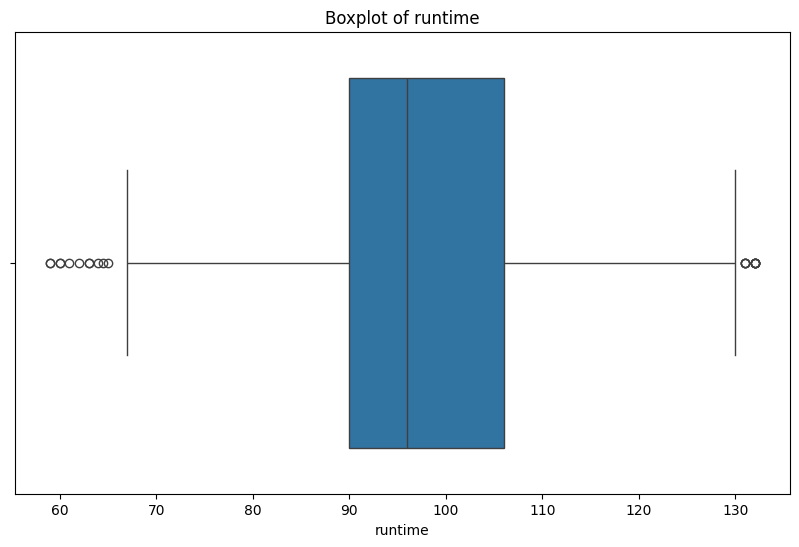

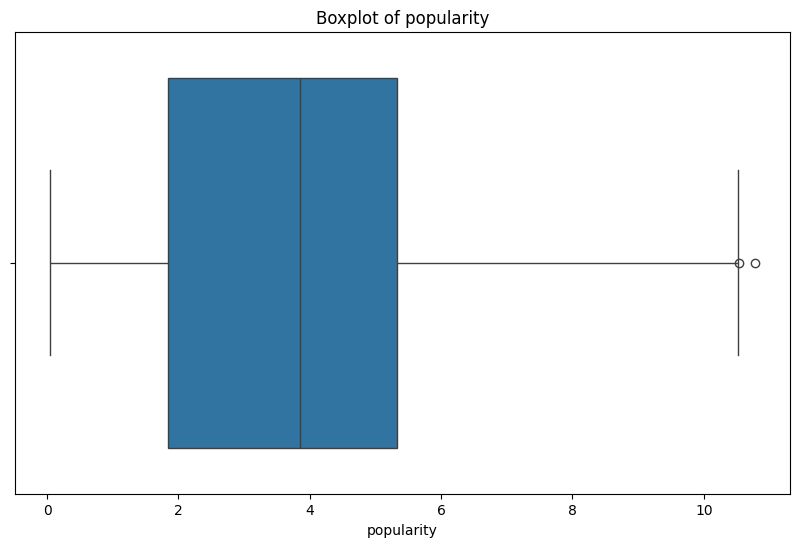

In [21]:
for col in numerical_cols:
    plot_numerical_distribution(revenue_train_df, col, bins=60)

for col in numerical_cols:
    plot_boxplot(revenue_train_df, col)

#### **Categorical variables**

In [22]:
def normalize_multilabel_series(s):
    """Chuẩn hoá chuỗi multi-label dạng '[A, B, C]' hoặc 'A,B,C' thành list các token sạch."""
    def _to_list(x):
        if pd.isna(x):
            return []
        x = str(x).strip()
        if x.startswith('[') and x.endswith(']'):
            x = x[1:-1]
        parts = [p.strip() for p in x.split(',') if p.strip()]
        return parts
    return s.apply(_to_list)


def explode_counts(df, column):
    """Explode cột multi-label thành từng phần tử và trả về Series đếm tần suất."""
    lists = normalize_multilabel_series(df[column])
    exploded = lists.explode()
    exploded = exploded.dropna()
    return exploded.value_counts().sort_values(ascending=False)


def plot_top_n_multilabel(df, column, top_n=20, figsize=(10, 6)):
    """Vẽ bar chart Top-N phần tử xuất hiện nhiều nhất trong cột multi-label."""
    vc = explode_counts(df, column)
    top = vc.head(top_n)
    plt.figure(figsize=figsize)
    sns.barplot(x=top.values, y=top.index, orient='h')
    plt.title(f"Bar chart in {column}")
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


def frequency_encode_multilabel(df, column, top_n=None, other_label='__OTHER__'):
    """
    Frequency encoding cho cột multi-label:
    - Trả về Series với mỗi hàng là tổng tần suất của các phần tử xuất hiện trong dòng đó.
    - Nếu top_n được chỉ định, các phần tử ngoài Top-N sẽ gán vào other_label.
    """
    vc = explode_counts(df, column)
    if top_n is not None and top_n > 0:
        allowed = set(vc.head(top_n).index)
    else:
        allowed = None

    def score_row(lst):
        if not lst:
            return 0
        total = 0
        for item in lst:
            if allowed is not None and item not in allowed:
                item_key = other_label
            else:
                item_key = item
            total += vc.get(item_key, vc.get(item, 0))
        return total

    lists = normalize_multilabel_series(df[column])
    return lists.apply(score_row)

**Vấn đề:**
* Nhiều giá trị trong một cell, cần phải xử lý tách chúng ra.
* Nếu quá nhiều giá trị thì xử lý và lấy top những giá trị có tần suất xuất hiện nhiều nhất 

In [23]:
categorical_cols = ['cast_top5', 'certification_US', 'collection_id', 'directors',
       'genres', 'original_language', 'production_companies', 'production_countries',
        'spoken_languages']

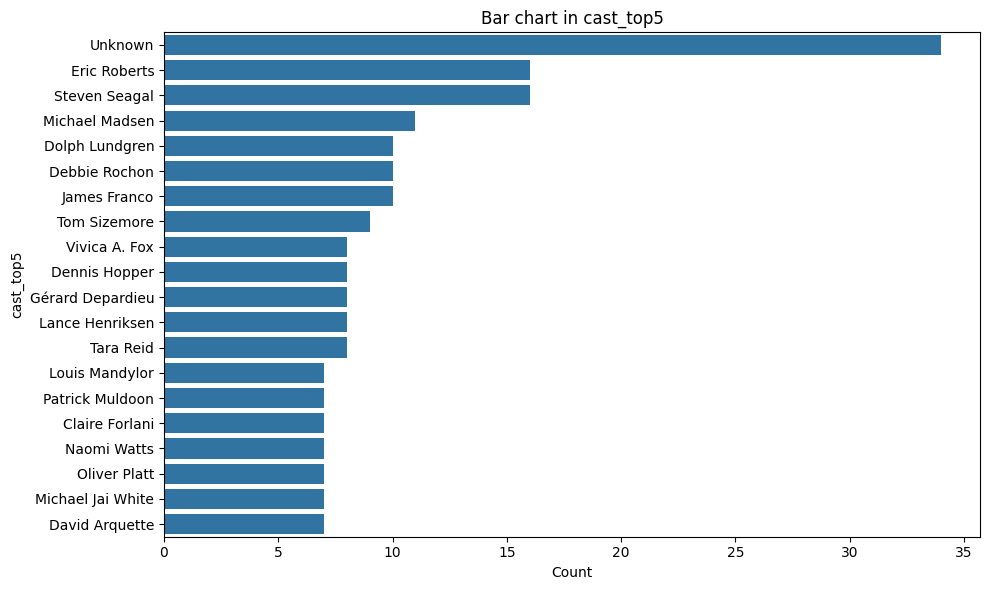

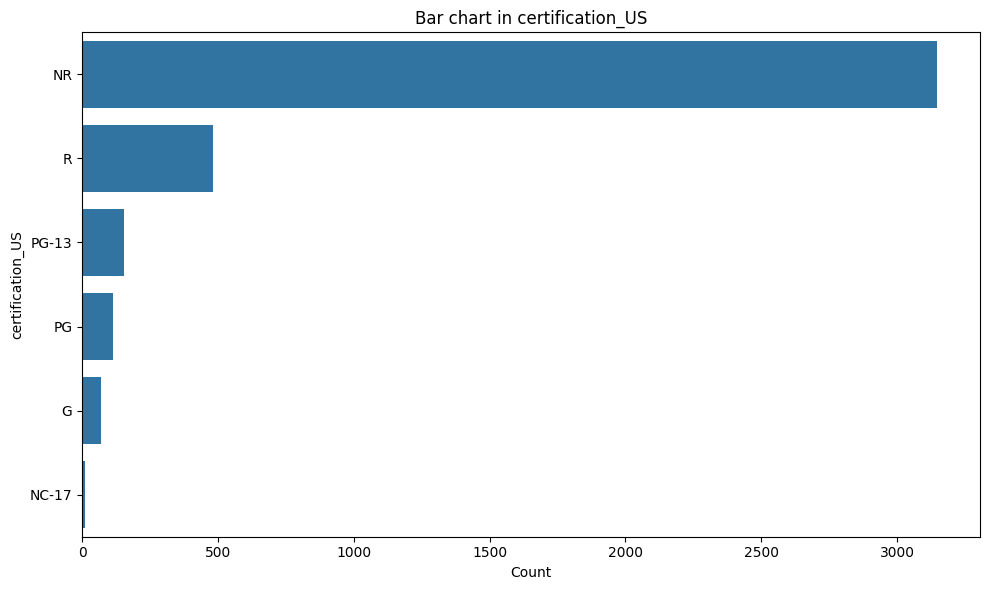

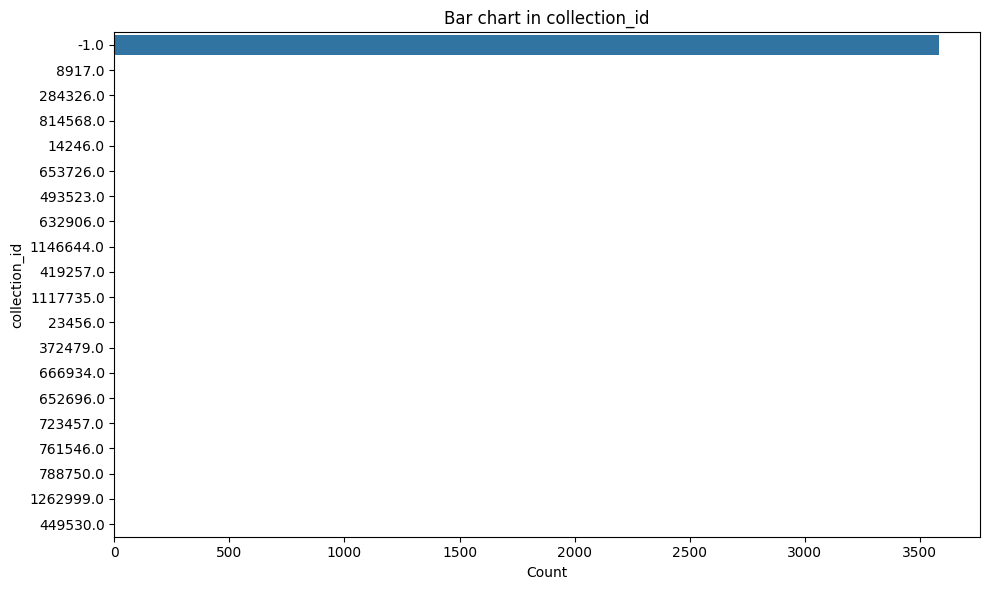

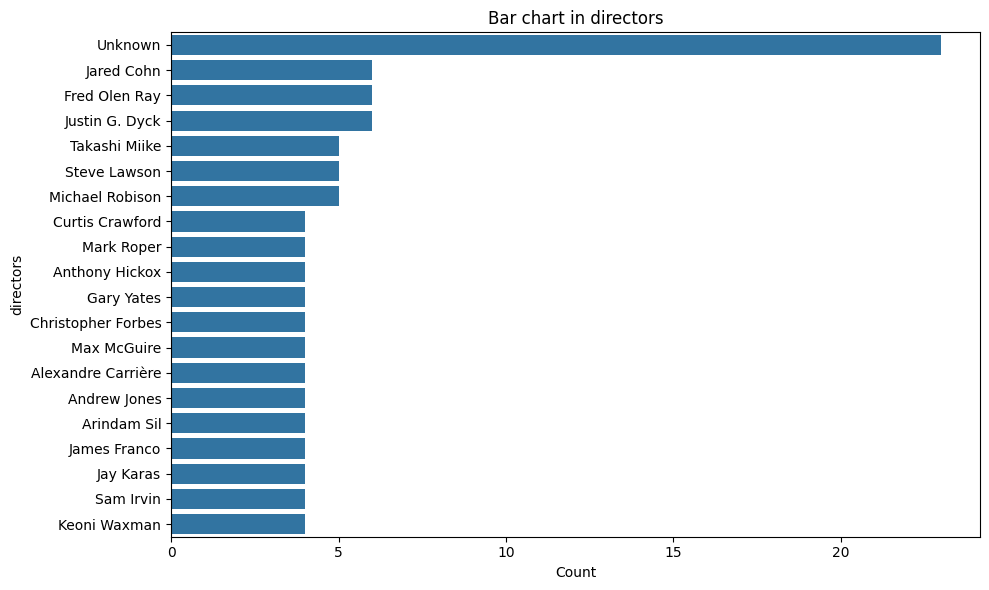

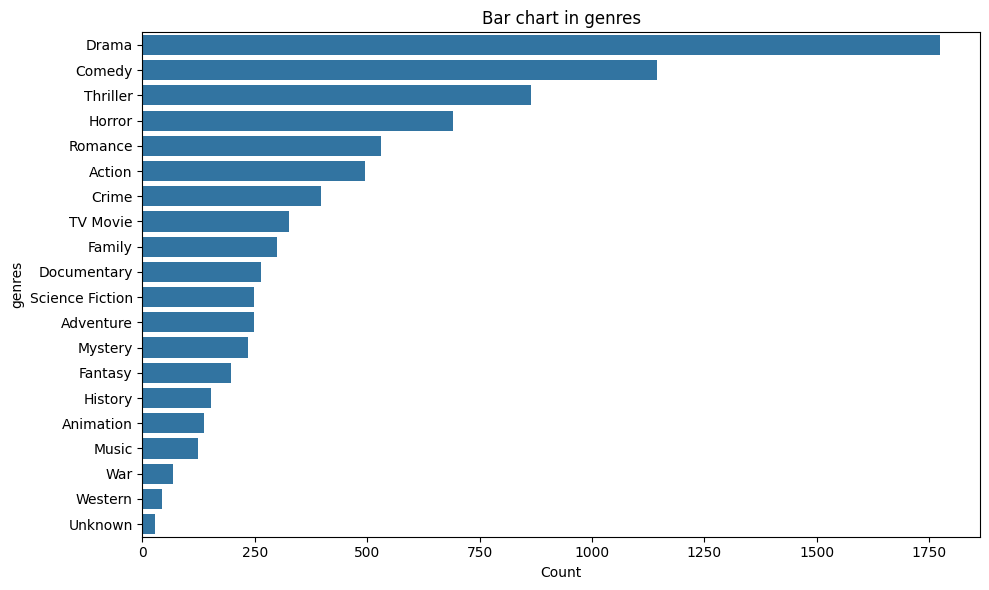

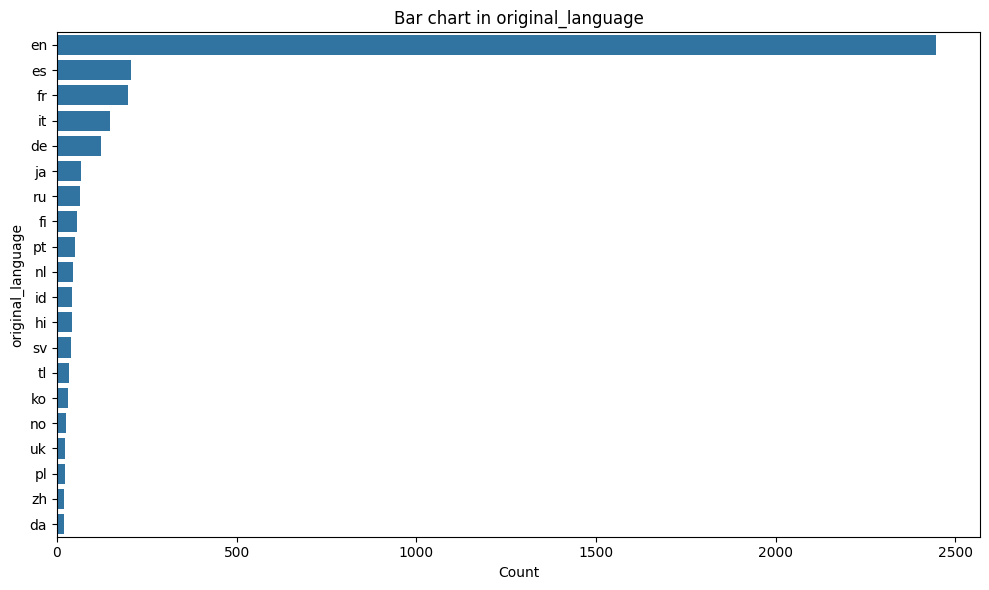

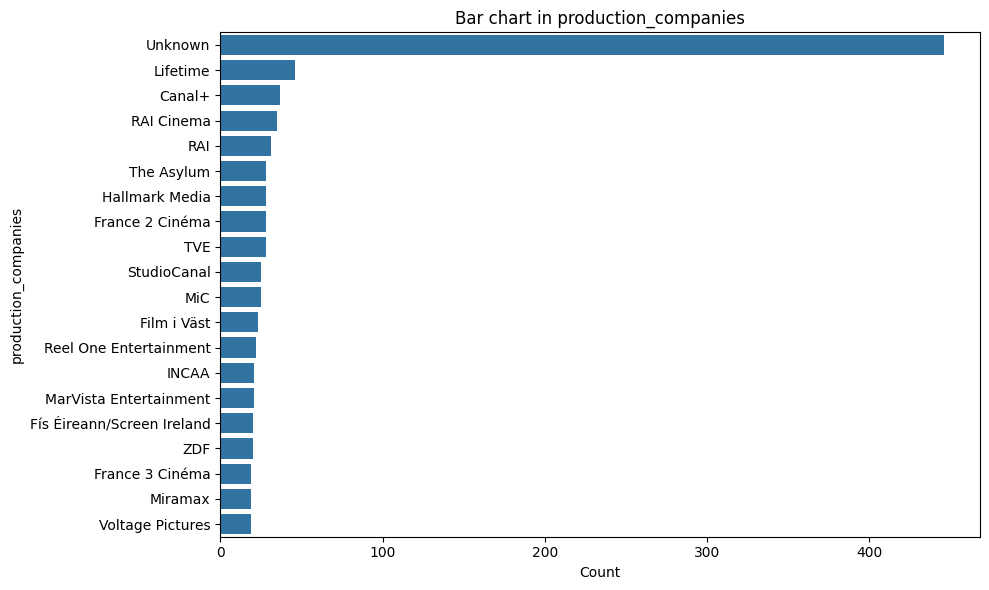

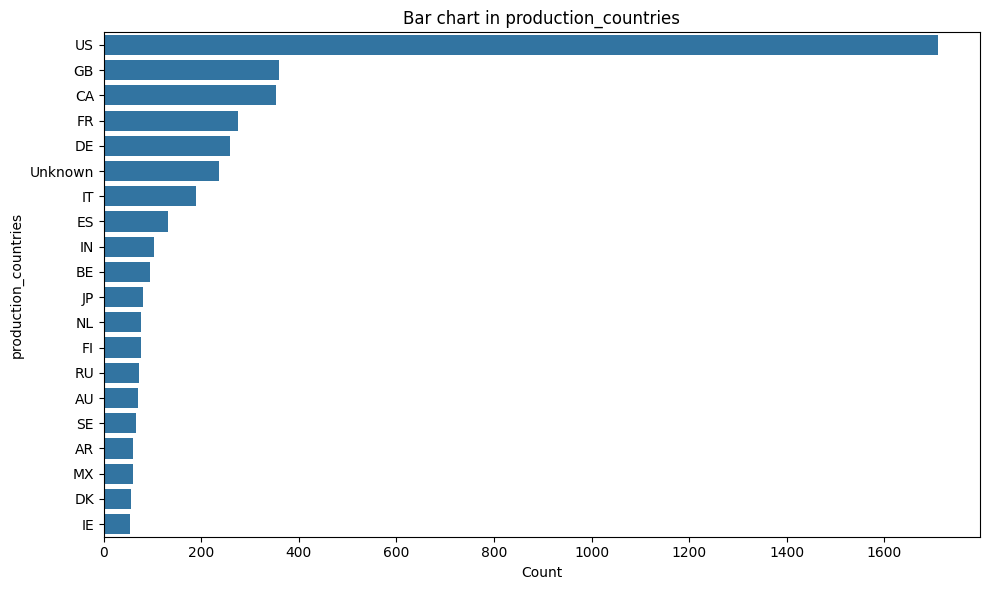

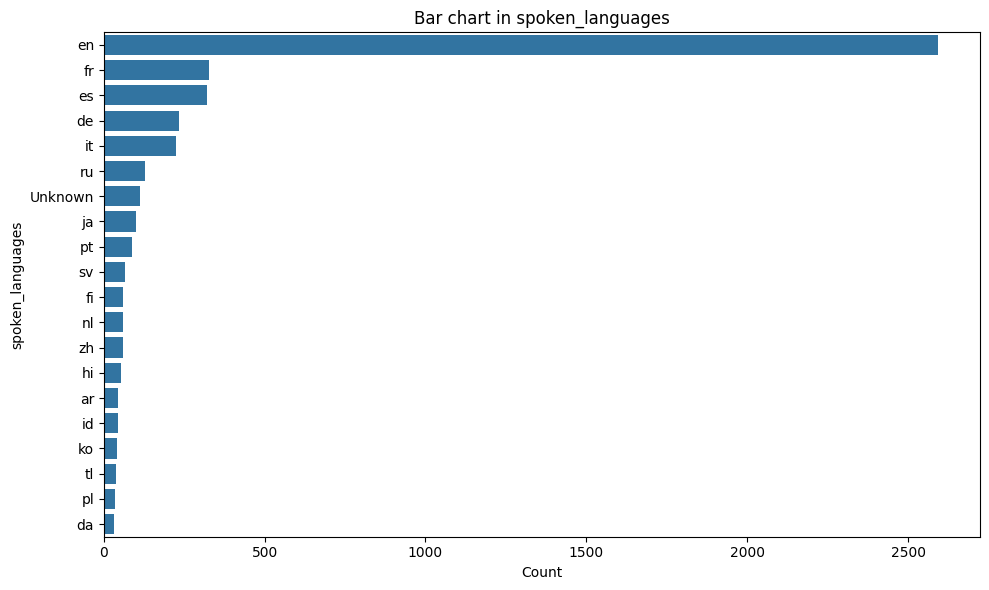

In [24]:
for col in categorical_cols:
    plot_top_n_multilabel(cleaned_train_df, col, top_n=20)

Nhận xét
* Trong biểu đồ collection giá trị -1 chiếm đa số, nhưng các biến còn lại không phân theo một category nhất định

#### **Text data**

Phân tích:
* Độ dài văn bản: số lượng từ (word count), độ dài trung bình, trung vị, tối thiểu và tối đa
* Tần suất Từ Đơn - Word Cloud
* Tần suất Cụm từ - N grams frequency
* Topic Modelling using LDA

In [25]:
# Clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Loại bỏ Stopwords
    stopwords = ['a', 'an', 'the', 'and', 'or', 'but', 'if', 'in', 'on', 'at', 'to',
                  'for', "of", 'is', 'are', 'was', 'were', 'it', 'this', 'that', 'these',
                 'those', 'he', 'she', 'they', 'them', 'his', 'her', 'its', 'my', 'your', 
                 'our', 'we', 'you', 'i', "me", 'as', 'by', 'with', 'from', 'not', 'be', 
                 'have', 'has', 'had', 'do', 'does', 'did', 'so', 'such', 'no', 'nor', 'too',
                 'very', 'can', 'will', 'just']
    text = ' '.join(word for word in text.split() if word not in stopwords)

    return text

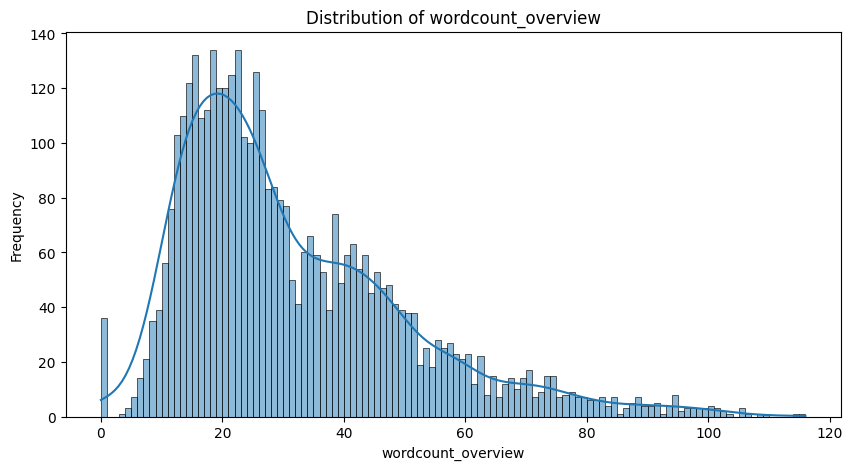

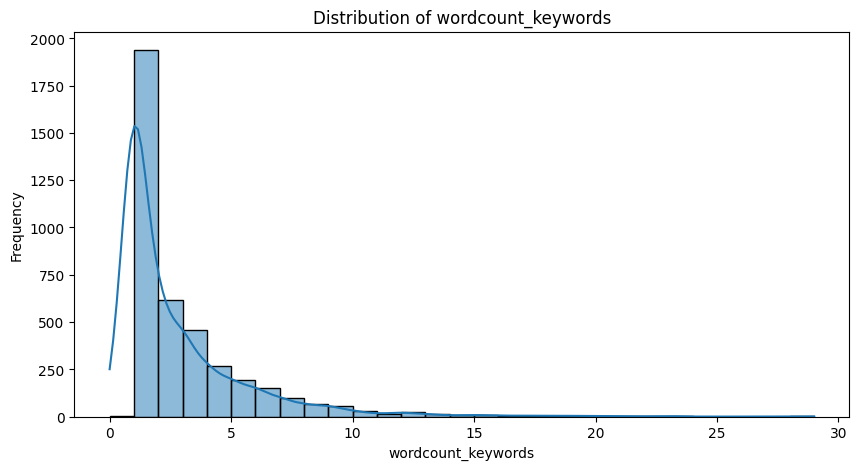

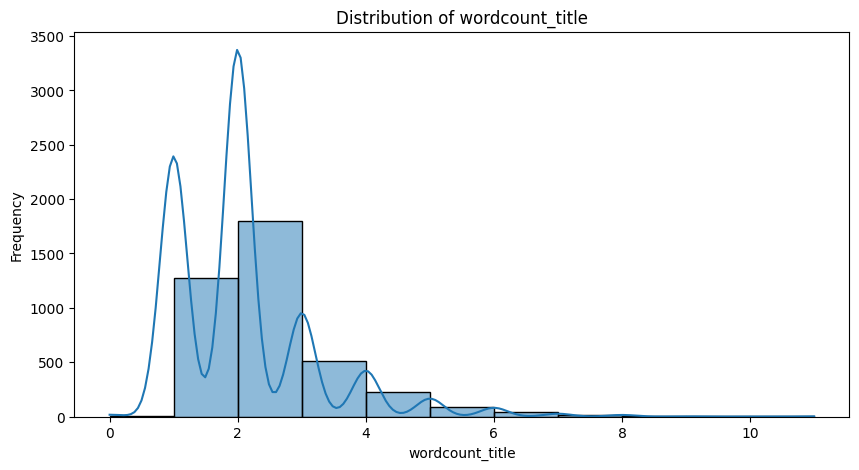

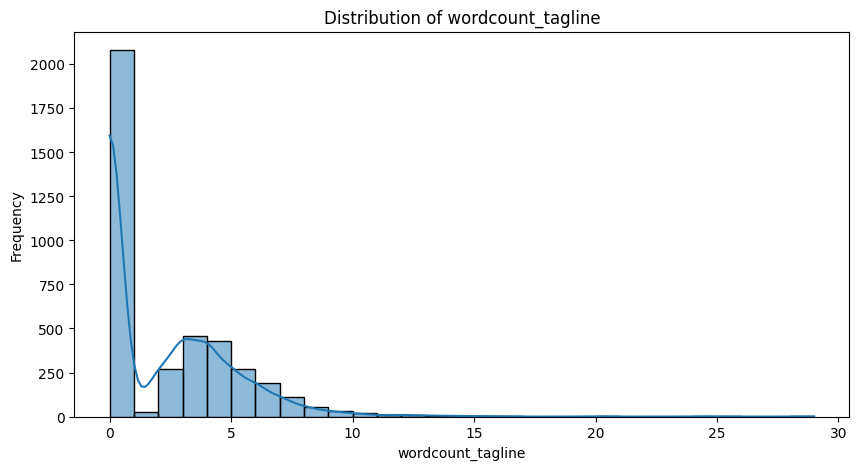

In [26]:
# Word count analysis
text_cols = ['overview', 'keywords', 'title', 'tagline']
text_count_cols = []

for col in text_cols:
    name_col = 'wordcount_' + col
    cleaned_train_df[name_col] = cleaned_train_df.apply(lambda x: len(clean_text(x[col]).split()) if pd.notna(x[col]) else 0, axis=1)
    text_count_cols.append(name_col)

for col in text_count_cols:
    bins = np.max(cleaned_train_df[col]) - np.min(cleaned_train_df[col])
    plot_numerical_distribution(cleaned_train_df, col, bins)

In [27]:
word_count_df = cleaned_train_df[text_count_cols]
word_count_df.describe()

wordcount_overview  wordcount_keywords  wordcount_title  \
count         3975.000000         3975.000000      3975.000000   
mean            31.321258            2.746415         2.058616   
std             18.823932            2.794793         1.116665   
min              0.000000            0.000000         0.000000   
25%             18.000000            1.000000         1.000000   
50%             26.000000            2.000000         2.000000   
75%             41.000000            3.000000         2.000000   
max            116.000000           29.000000        11.000000   

       wordcount_tagline  
count        3975.000000  
mean            2.108428  
std             2.738212  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             4.000000  
max            29.000000

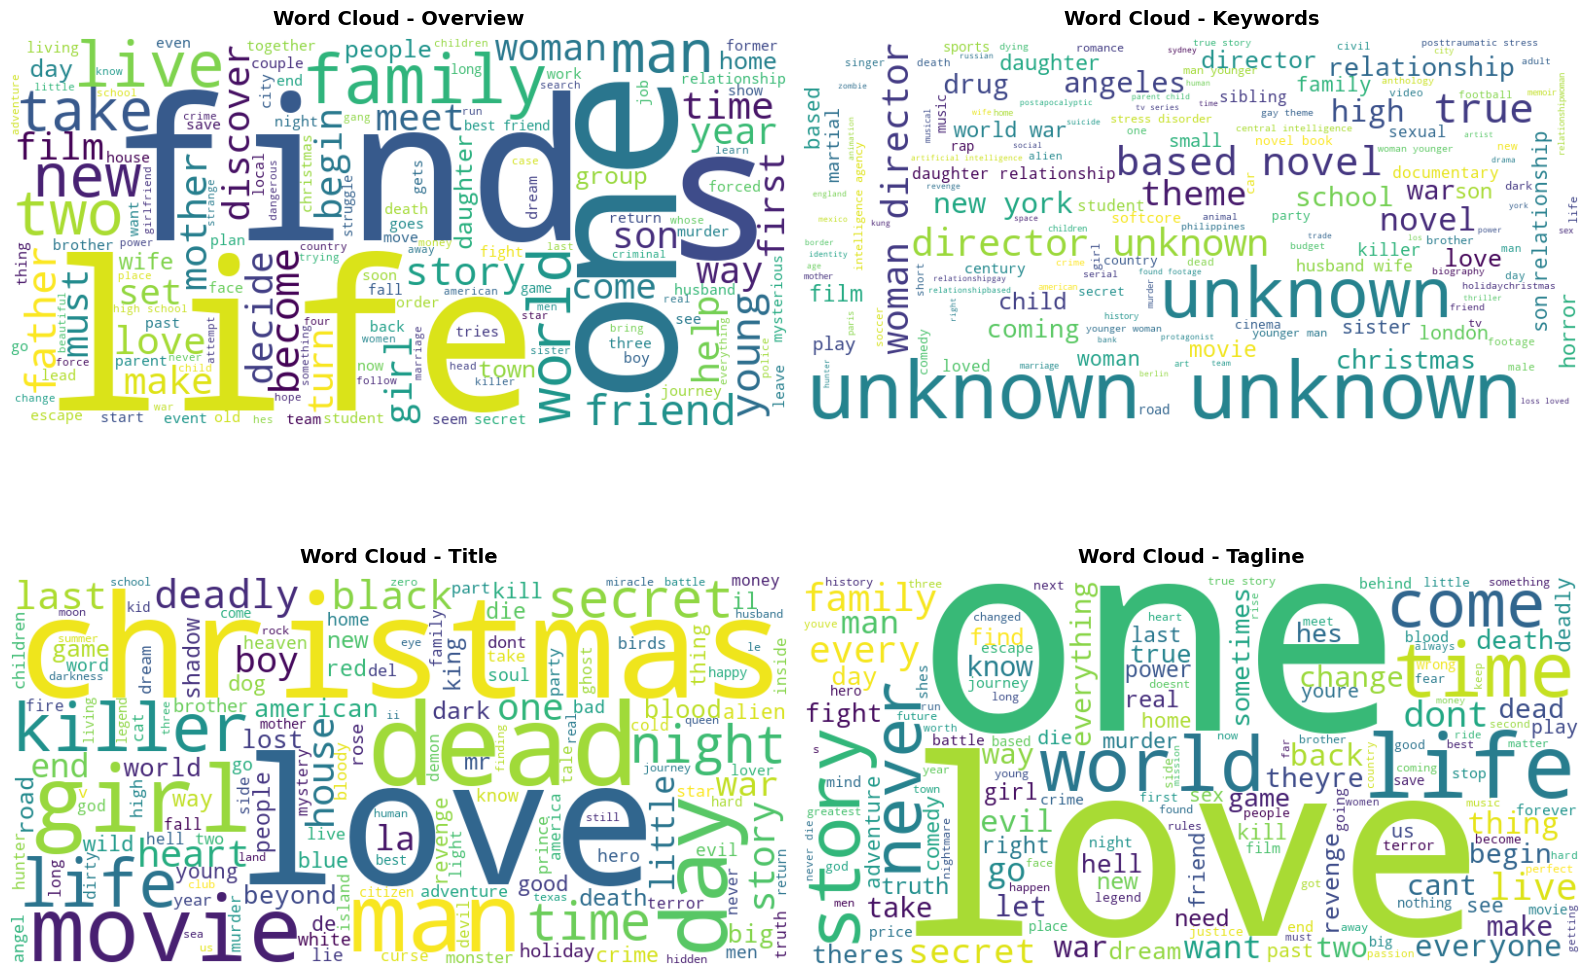

In [28]:
def plot_wordcloud(df, column, title=None, max_words=200, figsize=(12, 8), background_color='white'):
    text_data = df[column].fillna('').astype(str)
    all_text = ' '.join(text_data.apply(clean_text))
    
    if not all_text.strip():
        print(f"Không có dữ liệu text trong cột '{column}'")
        return None
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=max_words,
        background_color=background_color,
        colormap='viridis',
        relative_scaling=0.5,
        min_font_size=8
    ).generate(all_text)
    
    return wordcloud


def plot_wordclouds_grid(df, columns, max_words=150, figsize=(16, 12)):
    n_cols = len(columns)
    if n_cols > 4:
        print("Chỉ hỗ trợ tối đa 4 cột text")
        columns = columns[:4]
        n_cols = 4
    
    # Tạo subplot layout 2x2
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    
    for idx, col in enumerate(columns):
        wordcloud = plot_wordcloud(df, col, max_words=max_words)
        
        if wordcloud is not None:
            axes[idx].imshow(wordcloud, interpolation='bilinear')
            axes[idx].set_title(f'Word Cloud - {col.capitalize()}', 
                              fontsize=14, fontweight='bold', pad=10)
        else:
            axes[idx].text(0.5, 0.5, f'No data for {col}', 
                          ha='center', va='center', fontsize=12)
        
        axes[idx].axis('off')
    
    for idx in range(n_cols, 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_wordclouds_grid(cleaned_train_df, text_cols, max_words=150)


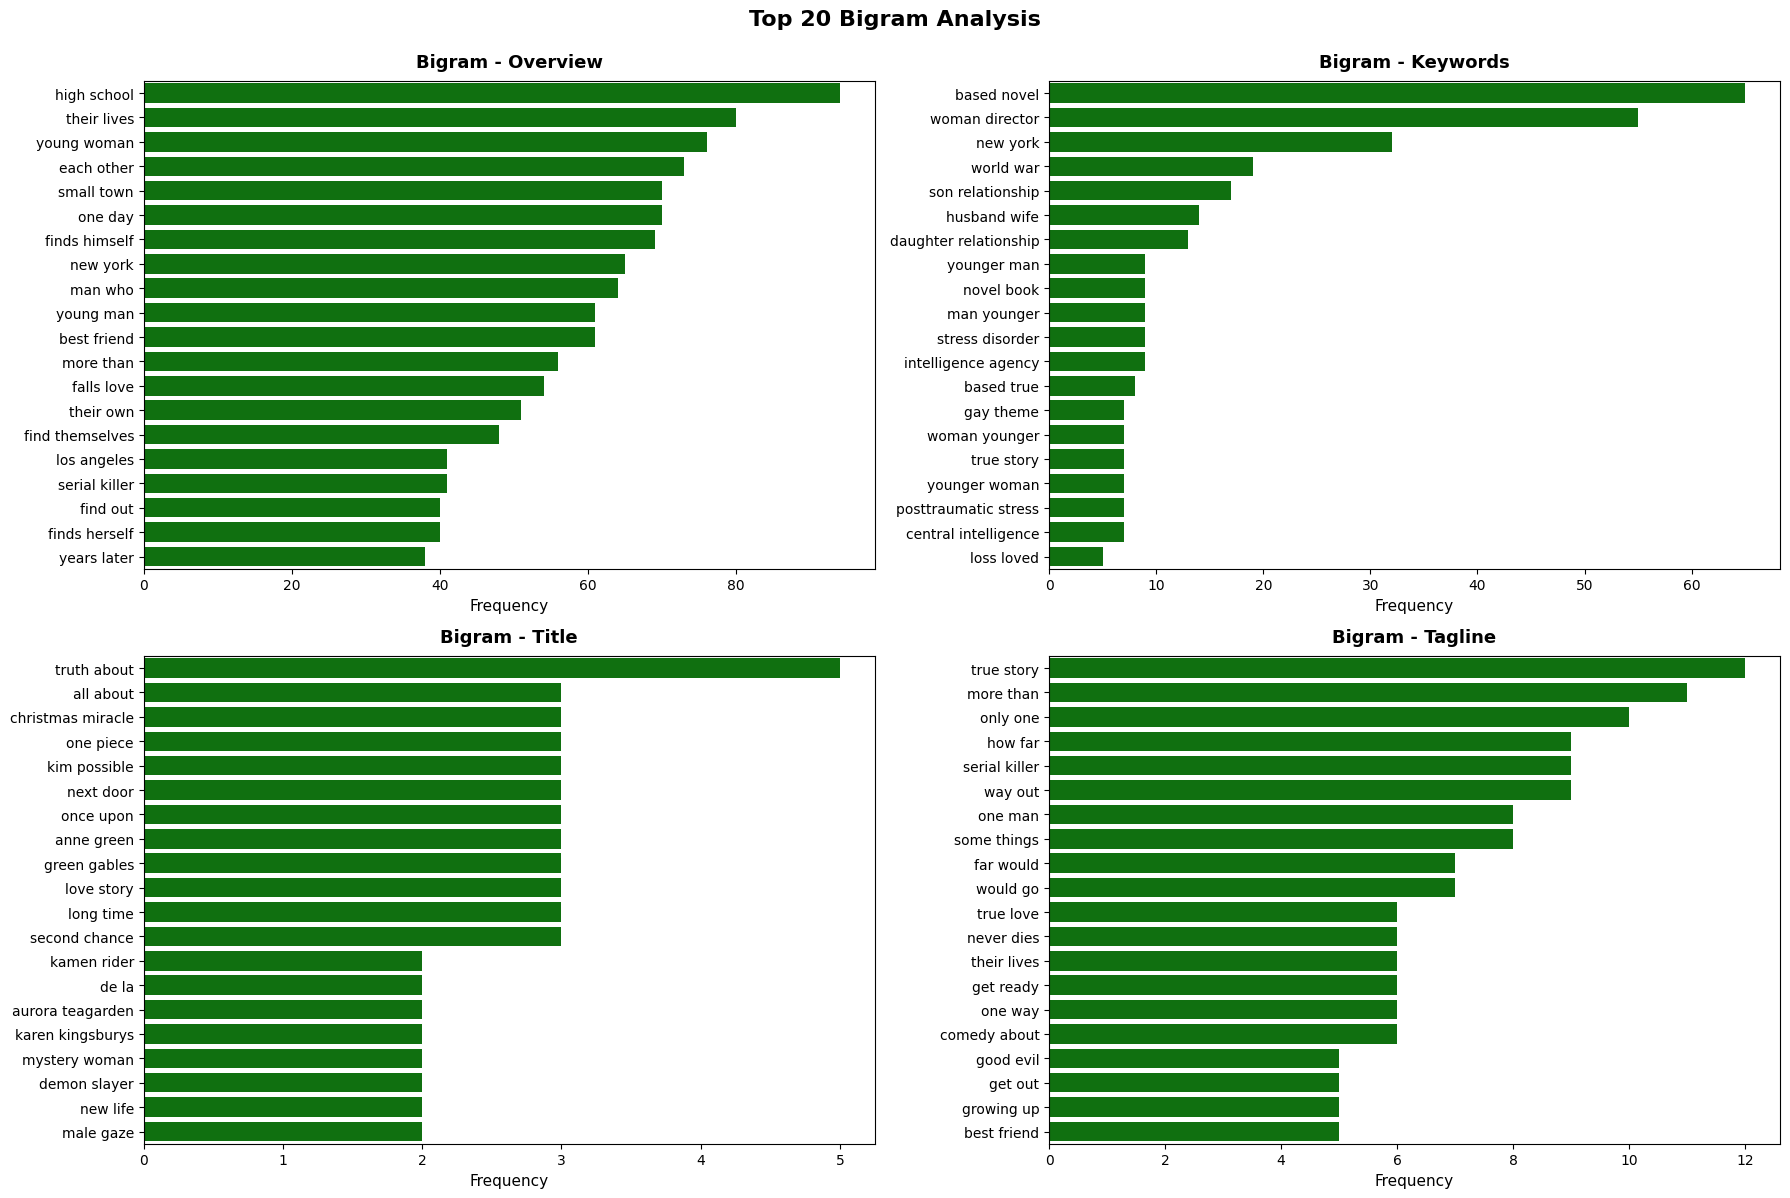

In [29]:
from collections import Counter

def get_ngrams(text, n=2):
    if not isinstance(text, str) or not text.strip():
        return []
    
    words = text.split()
    if len(words) < n:
        return []
    
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    
    return ngrams


def analyze_ngrams(df, column, n=2, top_k=20):
    all_ngrams = []
    
    for text in df[column].fillna('').astype(str):
        cleaned = clean_text(text)
        ngrams = get_ngrams(cleaned, n)
        all_ngrams.extend(ngrams)
    
    return Counter(all_ngrams).most_common(top_k)


def plot_ngrams_for_columns(df, columns, n=2, top_k=15, figsize=(18, 12)):
    """
    Vẽ n-grams cho nhiều cột text trong một figure layout 2x2.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame chứa dữ liệu
    columns : list
        Danh sách các cột text cần phân tích
    n : int
        Loại n-gram (1=unigram, 2=bigram, 3=trigram)
    top_k : int
        Số lượng n-grams phổ biến nhất
    figsize : tuple
        Kích thước figure
    """
    n_cols = len(columns)
    if n_cols > 4:
        print("Chỉ hỗ trợ tối đa 4 cột text")
        columns = columns[:4]
        n_cols = 4
    
    # Tạo subplot layout 2x2
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    
    ngram_names = {1: 'Unigram', 2: 'Bigram', 3: 'Trigram', 4: '4-gram', 5: '5-gram'}
    
    for idx, col in enumerate(columns):
        ngrams_freq = analyze_ngrams(df, col, n, top_k)
        
        if ngrams_freq:
            ngrams, frequencies = zip(*ngrams_freq)
            
            sns.barplot(x=list(frequencies), y=list(ngrams), orient='h', 
                       color='green', ax=axes[idx])
            
            title = f"{ngram_names.get(n, f'{n}-gram')} - {col.capitalize()}"
            axes[idx].set_title(title, fontsize=13, fontweight='bold', pad=10)
            axes[idx].set_xlabel('Frequency', fontsize=11)
            axes[idx].set_ylabel('', fontsize=11)
        else:
            axes[idx].text(0.5, 0.5, f'No {n}-gram data for {col}', 
                          ha='center', va='center', fontsize=12)
            axes[idx].set_xticks([])
            axes[idx].set_yticks([])
    
    # Ẩn các subplot thừa
    for idx in range(n_cols, 4):
        axes[idx].axis('off')
    
    plt.suptitle(f'Top {top_k} {ngram_names.get(n, f"{n}-grams")} Analysis', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

plot_ngrams_for_columns(cleaned_train_df, text_cols, n=2, top_k=20)


**Nhận xét**
* abc

# 2. Overall Analyses

## Câu hỏi ý nghĩa - Meaningful questions

**Câu hỏi 1: Xu hướng qua thời gian của các features quan trọng trong data là gì? (budget, revenue, runtime, vote_average)\
Câu hỏi 2: Có mối tương quan nào giữa điểm rating và các trường khác không?\
Câu hỏi 3: Thể loại phim nào hoặc sự kết hợp của các thể loại phim nào có tỷ lệ cao hơn (phổ biến hơn) qua các năm?\
Câu hỏi 4: Mối tương quan giữa các đặc trưng (features) của top các thể loại phổ biến là gì?\
Câu hỏi 5: Điểm Rating so với Tổng số phim đã đạo diễn của mỗi đạo diễn là bao nhiêu? Có mối tương quan nào giữa chúng không?\
Câu hỏi 6: Tỷ suất lợi nhuận (ROI = Revenue / Budget) ảnh hưởng thế nào đến Rating?**

### **Câu hỏi 1: Xu hướng qua thời gian của các features quan trọng trong data là gì?**

In [30]:
df_year_count = cleaned_train_df.groupby('release_year', as_index=False).count() # number of films by year
df_year_budget = cleaned_train_df.groupby(['release_year'], as_index=False)['budget'].agg(['sum', 'mean', 'std']) #  budget by year (or month of the year)
df_year_ave_runt = round(cleaned_train_df.groupby('release_year')['runtime'].mean(),2) # Average runtime in minutes by year
df_year_votes = cleaned_train_df.groupby('release_year')['vote_average'].sum() # no. of votes by year

In [31]:
df_year_count['release_year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int32)

Nhận xét: data chia thành 2 giai đoạn
* Giai đoạn 1: 2000 - 2005
* Giai đoạn 2: 2016 - 2021

In [32]:
df_year_budget

release_year           sum          mean           std
0           2000  1.060612e+09  5.303062e+06  5.246851e+06
1           2001  1.170636e+09  5.824062e+06  6.256562e+06
2           2002  1.072993e+09  5.183539e+06  5.642750e+06
3           2003  9.155563e+08  4.298387e+06  4.458329e+06
4           2004  1.334576e+09  4.682723e+06  5.445556e+06
5           2005  1.491676e+09  4.955735e+06  5.394276e+06
6           2016  2.299595e+09  4.553654e+06  4.611801e+06
7           2017  2.703799e+09  5.063295e+06  5.286524e+06
8           2018  2.758566e+09  5.156197e+06  5.141122e+06
9           2019  2.949370e+09  5.471929e+06  5.166601e+06
10          2020  2.159372e+09  4.987003e+06  4.925040e+06
11          2021  1.635614e+08  7.434611e+06  3.904585e+06

In [33]:
df_year_budget.sort_values('sum', ascending=False)

release_year           sum          mean           std
9           2019  2.949370e+09  5.471929e+06  5.166601e+06
8           2018  2.758566e+09  5.156197e+06  5.141122e+06
7           2017  2.703799e+09  5.063295e+06  5.286524e+06
6           2016  2.299595e+09  4.553654e+06  4.611801e+06
10          2020  2.159372e+09  4.987003e+06  4.925040e+06
5           2005  1.491676e+09  4.955735e+06  5.394276e+06
4           2004  1.334576e+09  4.682723e+06  5.445556e+06
1           2001  1.170636e+09  5.824062e+06  6.256562e+06
2           2002  1.072993e+09  5.183539e+06  5.642750e+06
0           2000  1.060612e+09  5.303062e+06  5.246851e+06
3           2003  9.155563e+08  4.298387e+06  4.458329e+06
11          2021  1.635614e+08  7.434611e+06  3.904585e+06

**Nhận xét:**
* Trong năm 2018, budget làm phim cao nhất với 36.64 triệu USD
* Trong năm 2021, budget làm phim thấp nhất với 2.981 triệu USD

In [34]:
df_year_1 = cleaned_train_df[cleaned_train_df['release_year'].between(2000, 2005)]
df_year_2 = cleaned_train_df[cleaned_train_df['release_year'].between(2016, 2021)]

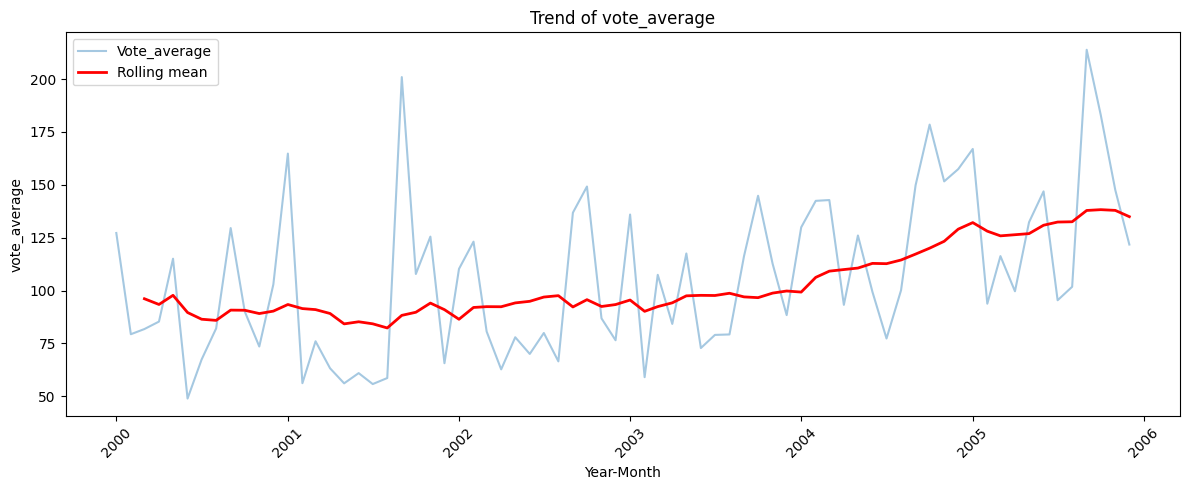

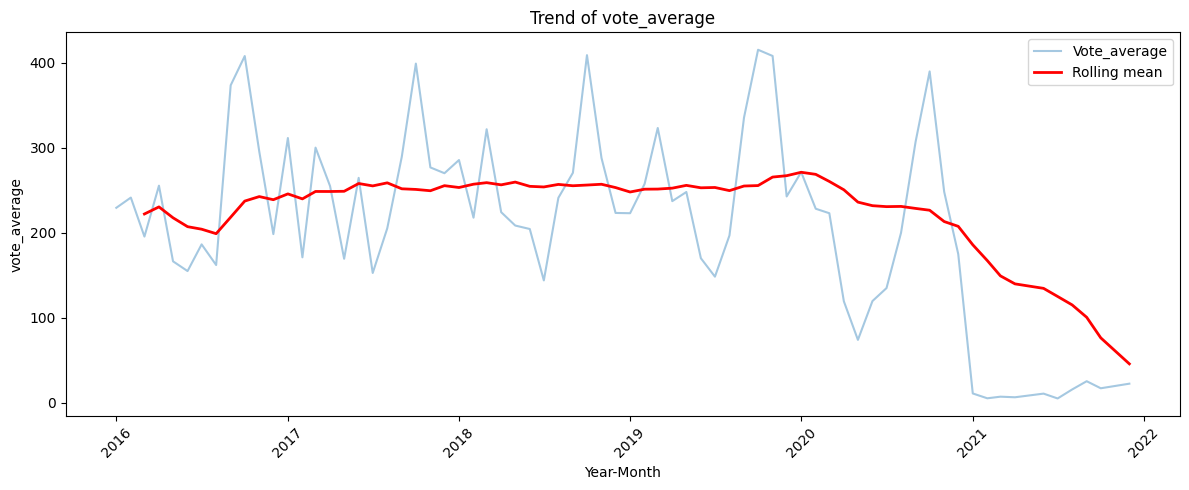

In [35]:
# trend average votes theo năm
plot_trend_line(df_year_1, 'release_date', 'vote_average')
plot_trend_line(df_year_2, 'release_date', 'vote_average')

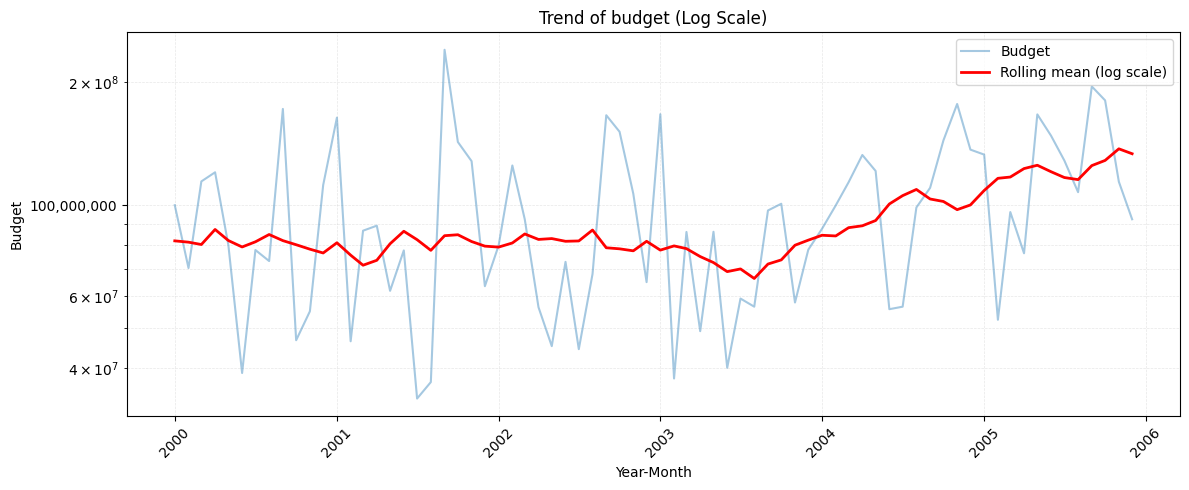

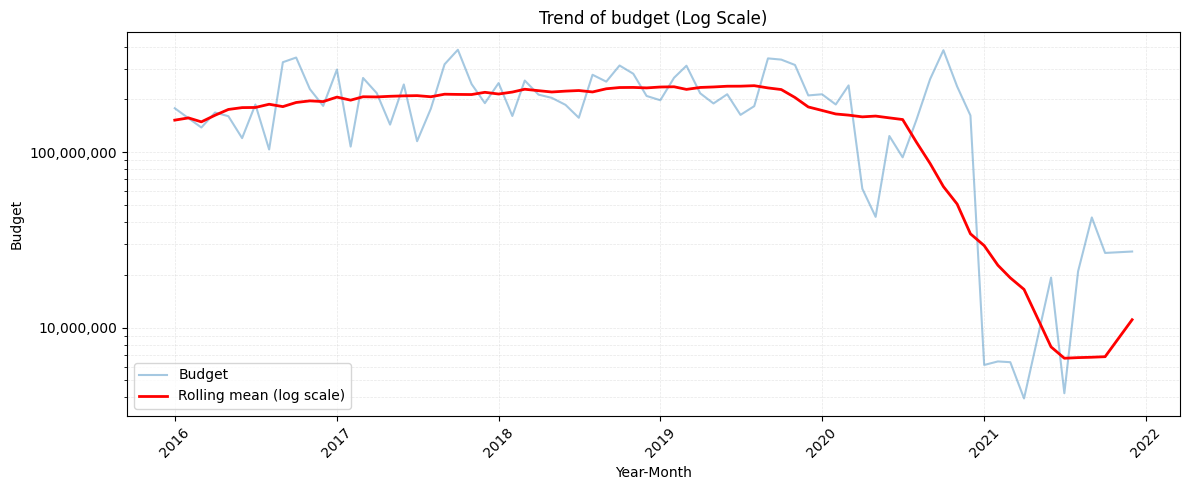

In [36]:
# Trend budget theo năm
plot_trend_line_log(df_year_1, 'release_date', 'budget')
plot_trend_line_log(df_year_2, 'release_date', 'budget')

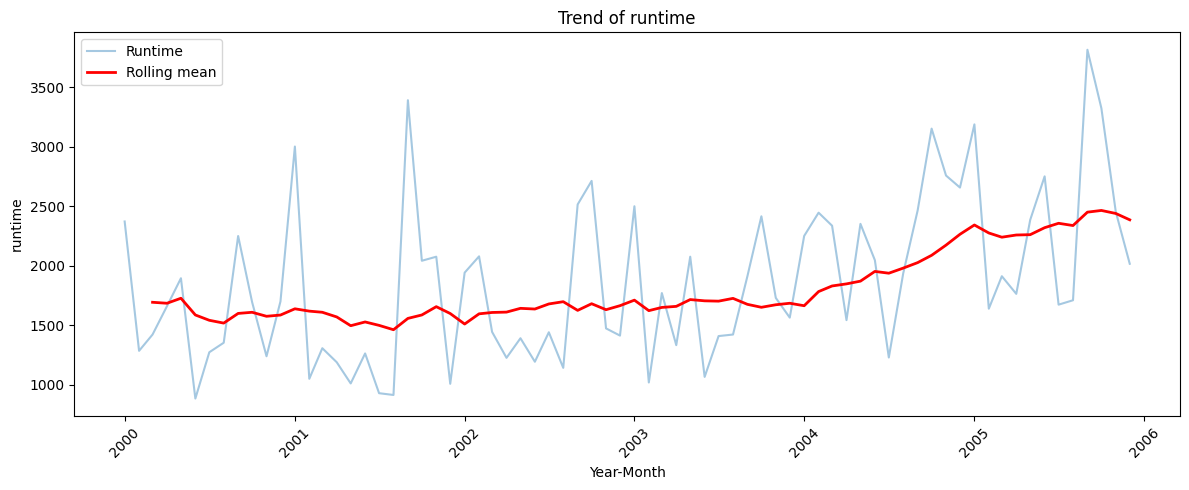

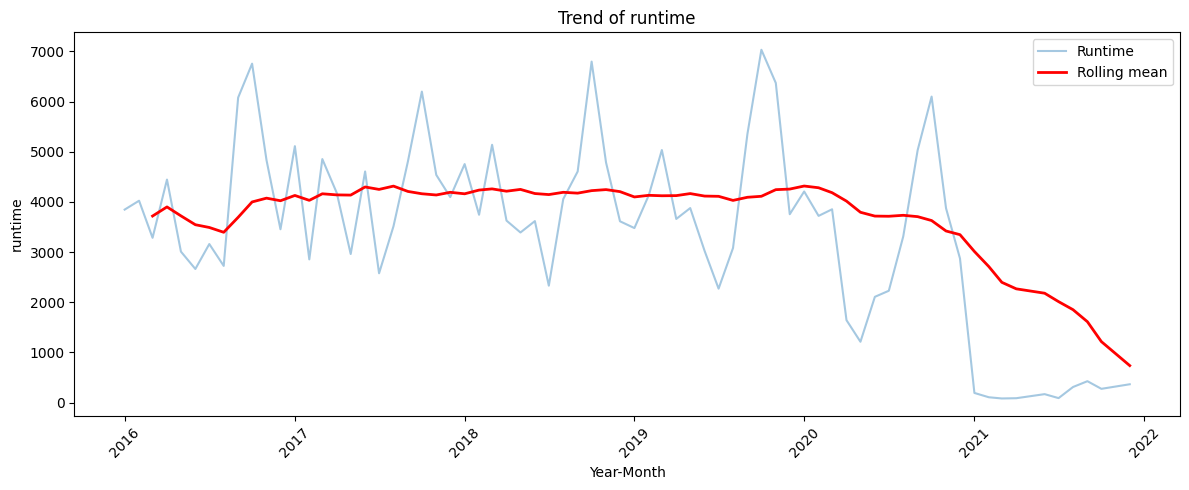

In [37]:
# Trend runtime theo năm
plot_trend_line(df_year_1, 'release_date', 'runtime')
plot_trend_line(df_year_2, 'release_date', 'runtime')

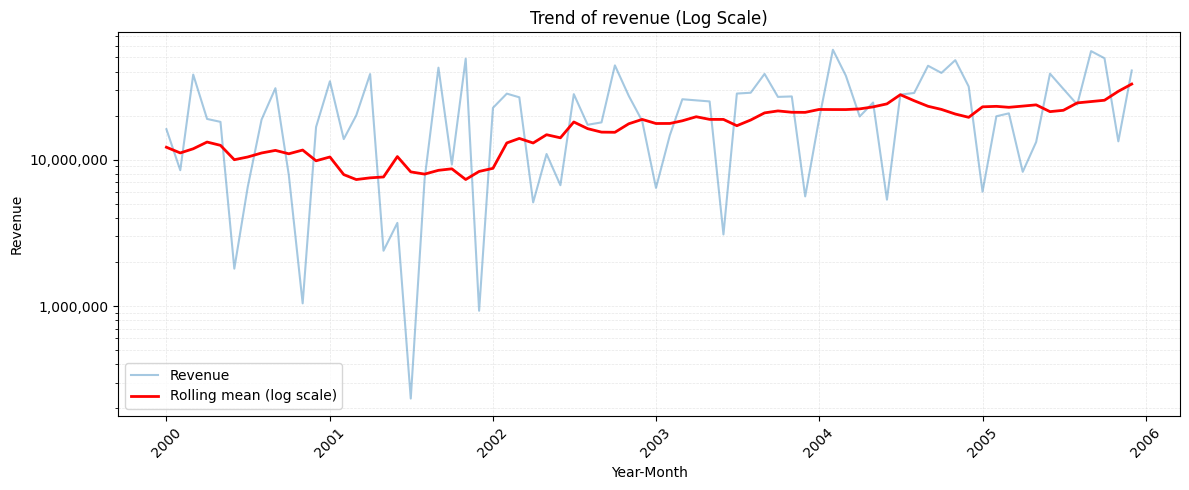

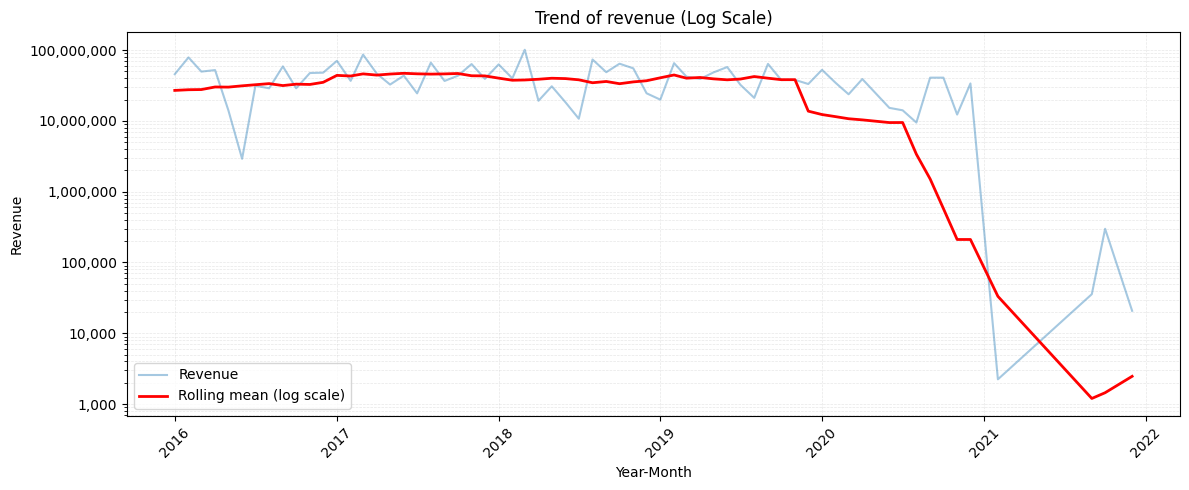

In [38]:
# Revenue trend - KHÔNG lọc trước, để hàm tự xử lý
plot_trend_line_log(df_year_1, 'release_date', 'revenue')
plot_trend_line_log(df_year_2, 'release_date', 'revenue')

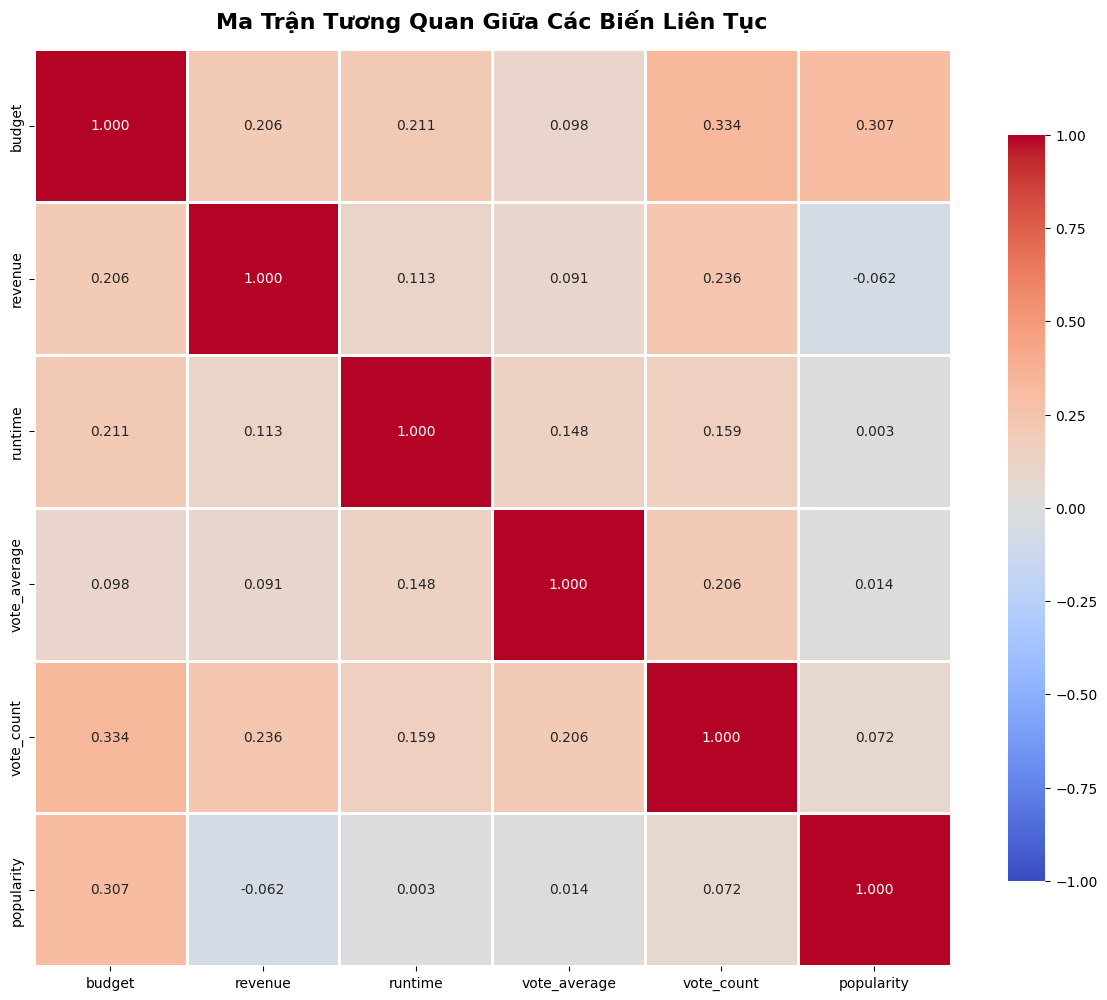

In [39]:
continuous_features = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']
plt.figure(figsize=(12, 10))
corr_matrix = cleaned_train_df[continuous_features].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8}
)

plt.title('Ma Trận Tương Quan Giữa Các Biến Liên Tục', 
          fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


### **Câu hỏi 2. Có mối tương quan nào giữa điểm rating và các trường khác không?**

In [40]:
# Lọc dữ liệu hợp lệ
df_clean = cleaned_train_df.dropna(subset=['runtime', 'vote_count', 'budget', 'revenue', 'vote_average'])

x1 = df_clean['runtime']
x2 = df_clean['vote_count']
x3 = df_clean['budget']
x4 = df_clean['revenue']
y = df_clean['vote_average'] # rating

R² of Rating VS Runtime = 0.022
R² of Rating VS Vote Count = 0.042
R² of Rating VS Budget = 0.01
R² of Rating VS Revenue = 0.008


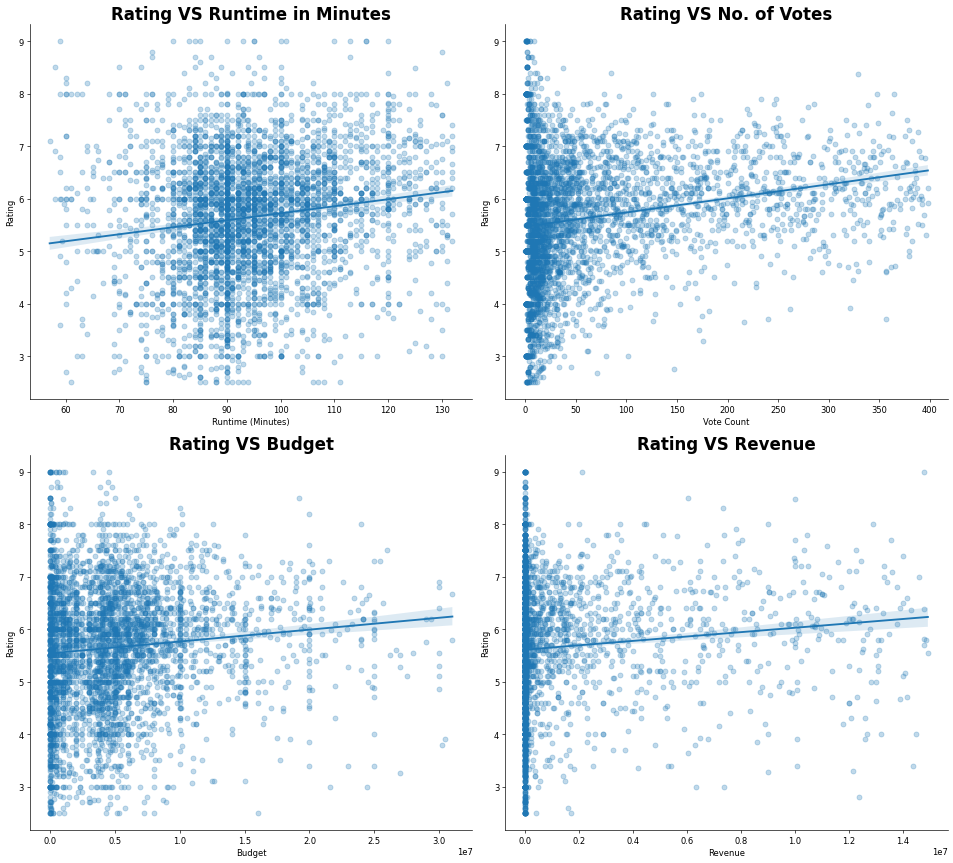

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16,14.5), dpi=60, nrows=2, ncols=2)

x_list_1 = [x1, x2, x3, x4]
ax_list_1 = [ax1, ax2, ax3, ax4]

for x, ax in zip(x_list_1, ax_list_1):
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.28})

ax1.set_title('Rating VS Runtime in Minutes', fontsize=20, fontweight='heavy')
# ax1.set_xticks()
ax1.set_xlabel('Runtime (Minutes)')
ax1.set_ylabel('Rating')

ax2.set_title('Rating VS No. of Votes', fontsize=20, fontweight='heavy')
ax2.set_xlabel('Vote Count')
ax2.set_ylabel('Rating')

ax3.set_title('Rating VS Budget', fontsize=20, fontweight='heavy')
ax3.set_xlabel('Budget')
ax3.set_ylabel('Rating')

ax4.set_title('Rating VS Revenue', fontsize=20, fontweight='heavy')
ax4.set_xlabel('Revenue')
ax4.set_ylabel('Rating')

# Tính r² values
lin_reg_1 = LinearRegression().fit(x1.values.reshape(-1, 1), y)
lin_reg_2 = LinearRegression().fit(x2.values.reshape(-1, 1), y)
lin_reg_3 = LinearRegression().fit(x3.values.reshape(-1, 1), y)
lin_reg_4 = LinearRegression().fit(x4.values.reshape(-1, 1), y)

r2_1 = lin_reg_1.score(x1.values.reshape(-1, 1), y) 
r2_2 = lin_reg_2.score(x2.values.reshape(-1, 1), y)
r2_3 = lin_reg_3.score(x3.values.reshape(-1, 1), y)
r2_4 = lin_reg_4.score(x4.values.reshape(-1, 1), y)

print(f'R² of Rating VS Runtime = {round(r2_1, 3)}')
print(f'R² of Rating VS Vote Count = {round(r2_2, 3)}')
print(f'R² of Rating VS Budget = {round(r2_3, 3)}')
print(f'R² of Rating VS Revenue = {round(r2_4, 3)}')

sns.despine() 
plt.tight_layout()
plt.show()


**Nhận xét:**
* IMDB Ratings have no strong correlations with other numerical features of films

### **Câu hỏi 3: Thể loại phim nào hoặc sự kết hợp của các thể loại phim nào có tỷ lệ cao hơn (phổ biến hơn) qua các năm?**

Phân tích thành 2 giai đoạn:
* 2000-2005
* 2016-2021

Lấy top 5 thể loại phổ biến nhất để vẽ linechart + Barchart qua các năm trong 2 giai đoạn

GIAI ĐOẠN 1: 2000-2005


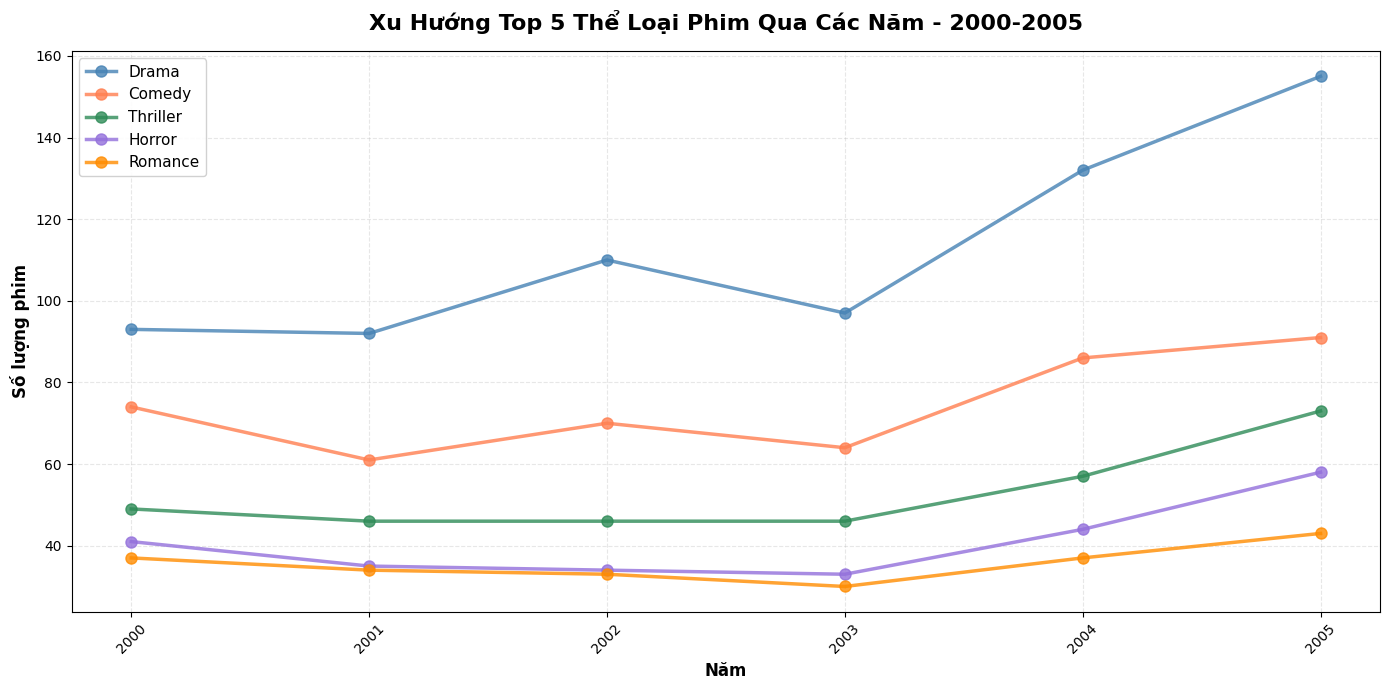

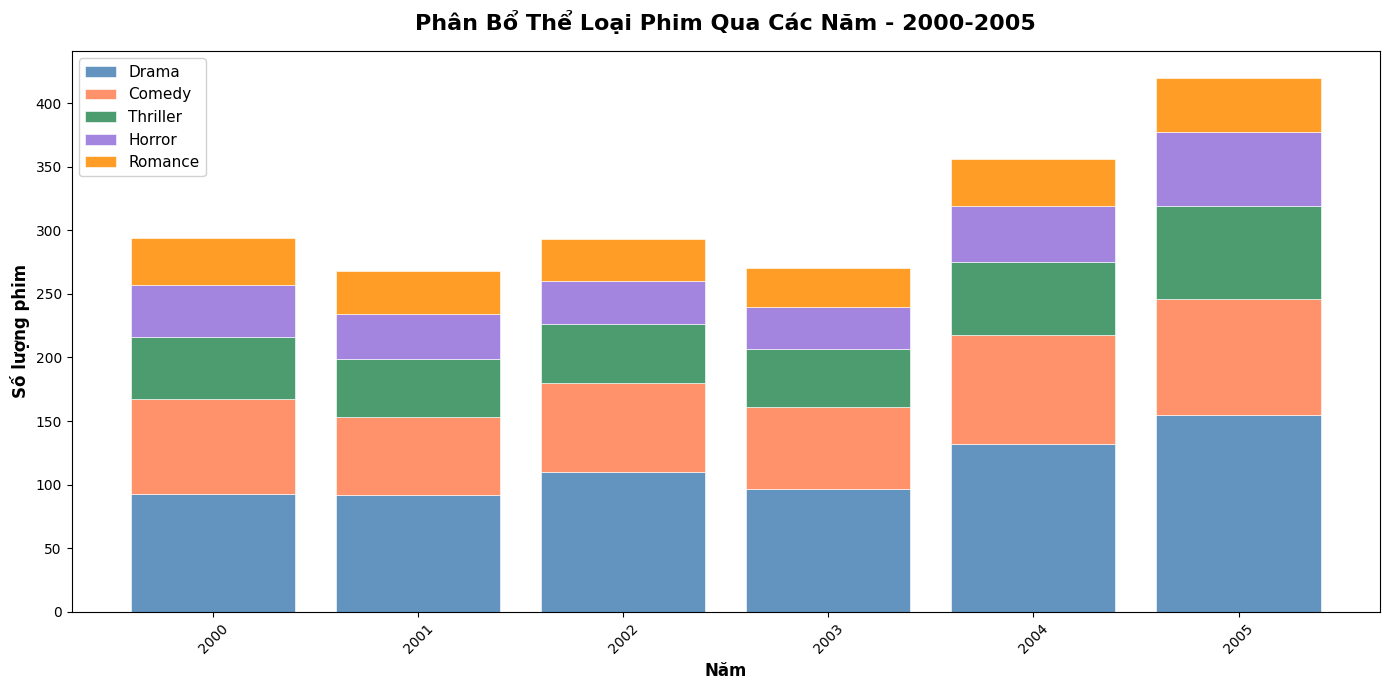


GIAI ĐOẠN 2: 2016-2021


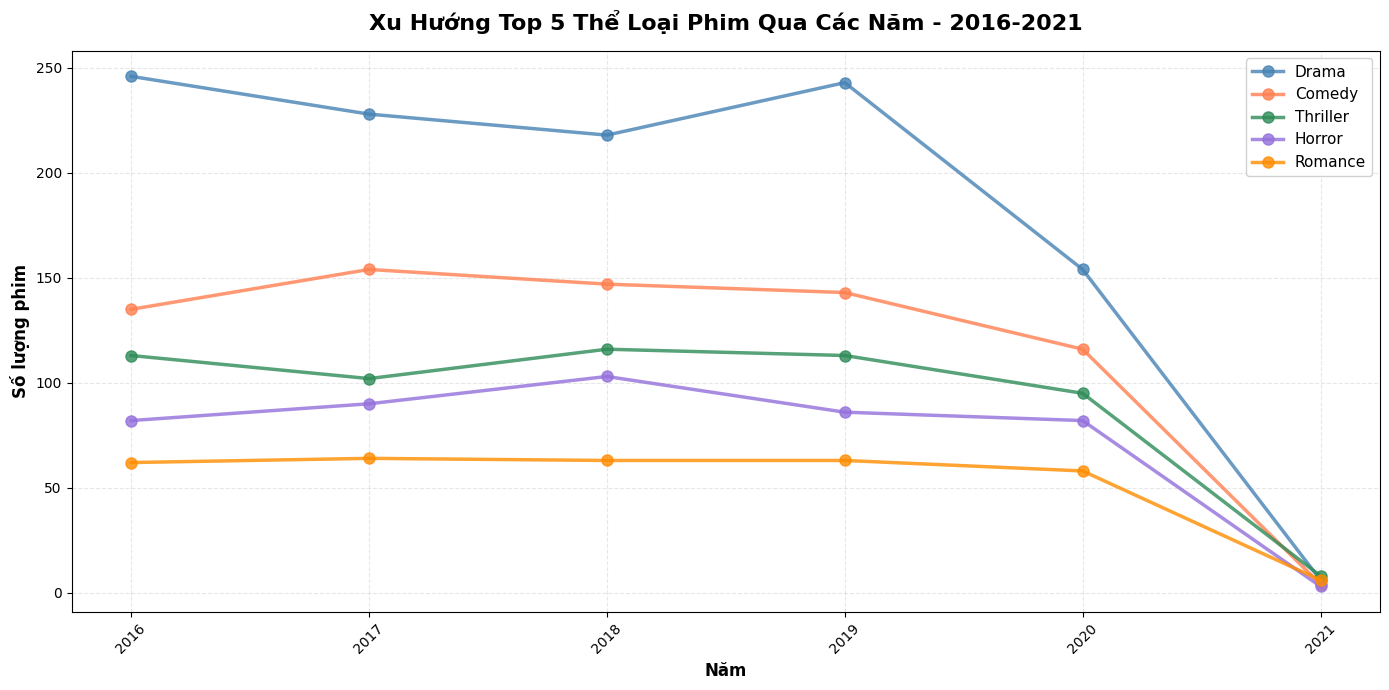

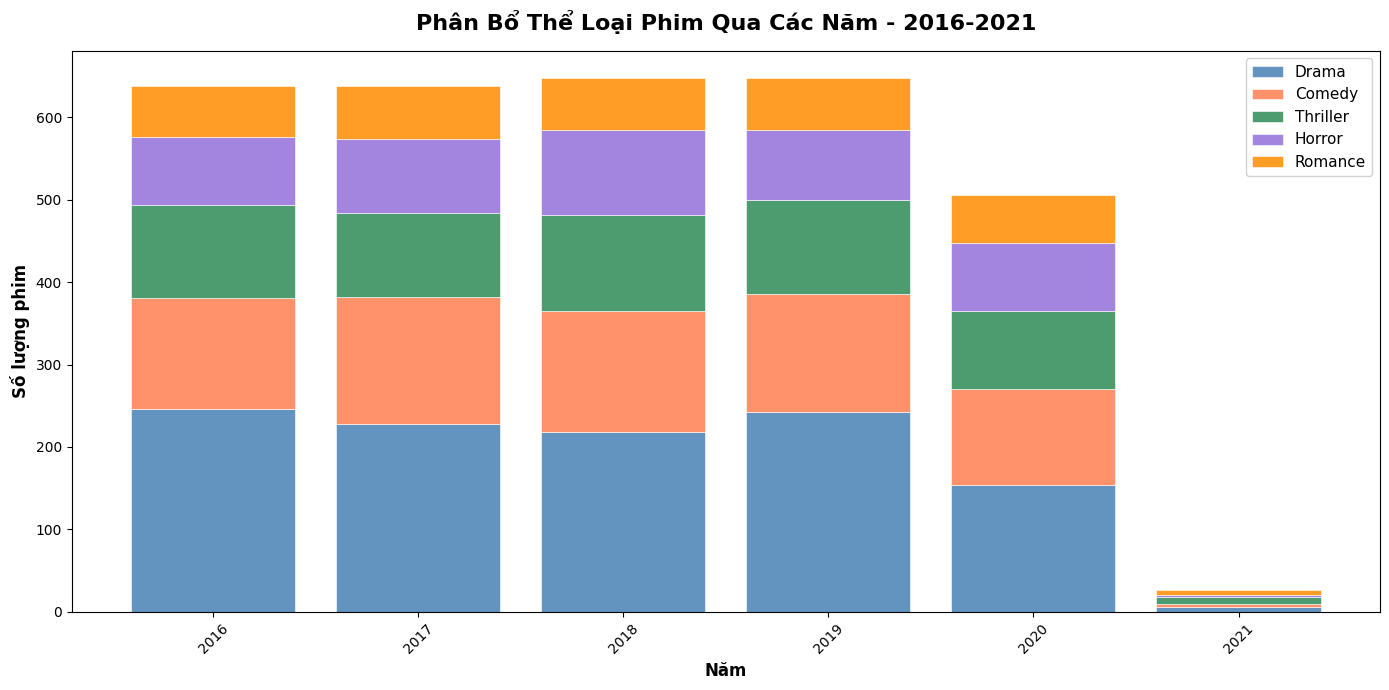

In [42]:
def analyze_genre_trends_by_year(df, top_genres=5):
    """
    Phân tích số lượng phim theo thể loại qua từng năm.
    """
    # Lấy top N thể loại phổ biến nhất
    top_genre_list = explode_counts(df, 'genres').head(top_genres).index.tolist()
    
    # Tạo dictionary để lưu số lượng phim mỗi thể loại theo năm
    genre_by_year = {genre: [] for genre in top_genre_list}
    years = sorted(df['release_year'].unique())
    
    for year in years:
        df_year = df[df['release_year'] == year]
        genre_counts = explode_counts(df_year, 'genres')
        
        for genre in top_genre_list:
            count = genre_counts.get(genre, 0)
            genre_by_year[genre].append(count)
    
    return years, genre_by_year, top_genre_list


def plot_genre_trends_by_period(df, period_name, top_genres=5):
    """
    Vẽ biểu đồ xu hướng thể loại phim qua các năm.
    """
    years, genre_by_year, top_genre_list = analyze_genre_trends_by_year(df, top_genres)
    
    # Vẽ biểu đồ line plot
    plt.figure(figsize=(14, 7))
    
    colors = ['steelblue', 'coral', 'seagreen', 'mediumpurple', 'darkorange', 
              'crimson', 'teal', 'gold', 'navy', 'darkred']
    
    for idx, genre in enumerate(top_genre_list):
        plt.plot(years, genre_by_year[genre], marker='o', linewidth=2.5, 
                markersize=8, label=genre, color=colors[idx % len(colors)], alpha=0.8)
    
    plt.title(f'Xu Hướng Top {top_genres} Thể Loại Phim Qua Các Năm - {period_name}', 
              fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Năm', fontsize=12, fontweight='bold')
    plt.ylabel('Số lượng phim', fontsize=12, fontweight='bold')
    plt.legend(loc='best', fontsize=11, framealpha=0.9)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    
    bottom = np.zeros(len(years))
    for idx, genre in enumerate(top_genre_list):
        plt.bar(years, genre_by_year[genre], bottom=bottom, label=genre, 
               color=colors[idx % len(colors)], alpha=0.85, edgecolor='white', linewidth=0.5)
        bottom += np.array(genre_by_year[genre])
    
    plt.title(f'Phân Bổ Thể Loại Phim Qua Các Năm - {period_name}', 
              fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Năm', fontsize=12, fontweight='bold')
    plt.ylabel('Số lượng phim', fontsize=12, fontweight='bold')
    plt.legend(loc='best', fontsize=11, framealpha=0.9)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

print("GIAI ĐOẠN 1: 2000-2005")
plot_genre_trends_by_period(df_year_1, "2000-2005", top_genres=5)

print("\nGIAI ĐOẠN 2: 2016-2021")
plot_genre_trends_by_period(df_year_2, "2016-2021", top_genres=5)


Top 10 sự kết hợp thể loại phổ biến:
 1. Drama                                   :  163 (11.58%)
 2. Comedy                                  :  102 ( 7.25%)
 3. Horror                                  :   57 ( 4.05%)
 4. Comedy,Drama                            :   50 ( 3.55%)
 5. Drama,Romance                           :   49 ( 3.48%)
 6. Documentary                             :   39 ( 2.77%)
 7. Comedy,Romance                          :   32 ( 2.27%)
 8. Thriller                                :   22 ( 1.56%)
 9. Horror,Thriller                         :   20 ( 1.42%)
10. Comedy,Drama,Romance                    :   19 ( 1.35%)


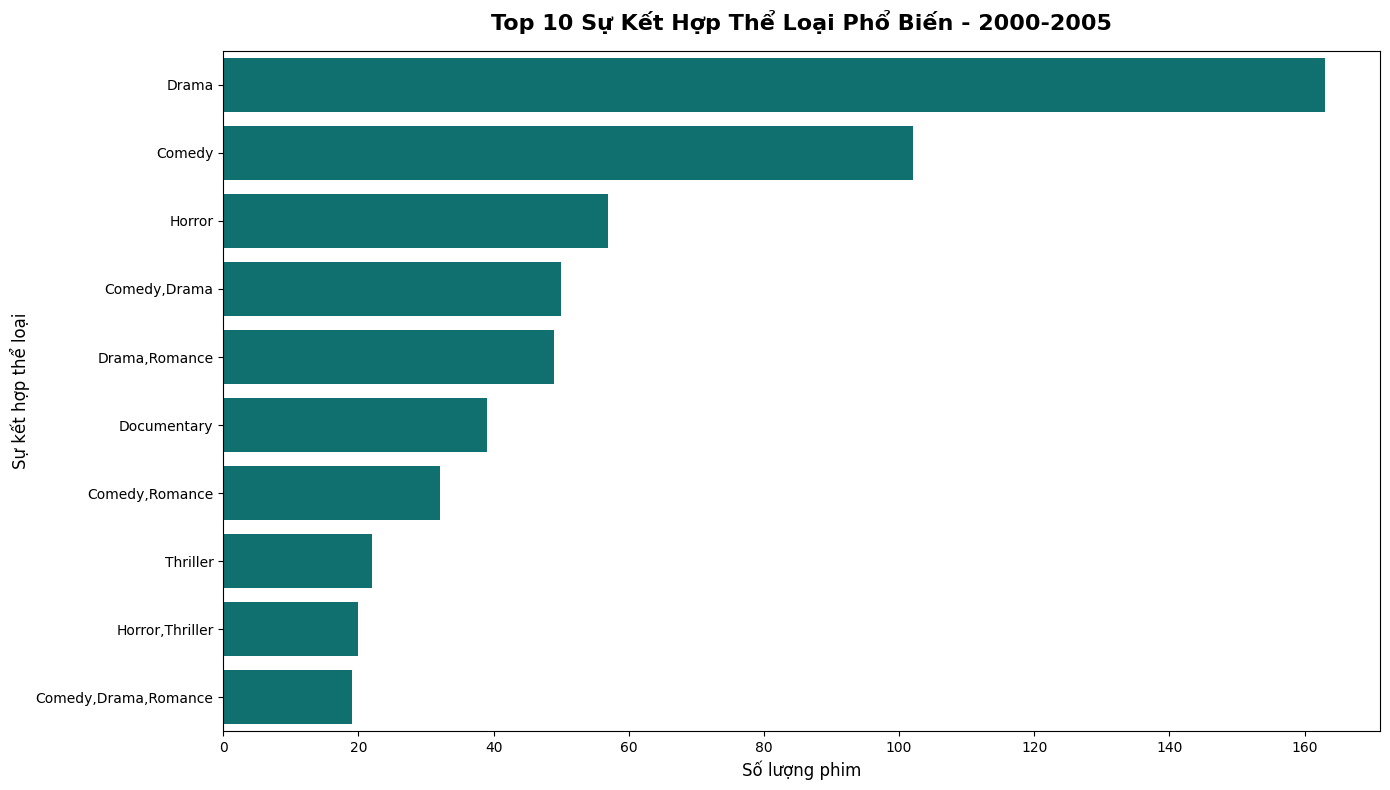

Top 10 sự kết hợp thể loại phổ biến:
 1. Drama                                   :  301 (11.72%)
 2. Comedy                                  :  165 ( 6.43%)
 3. Documentary                             :  133 ( 5.18%)
 4. Horror                                  :  111 ( 4.32%)
 5. Comedy,Drama                            :   88 ( 3.43%)
 6. Drama,Romance                           :   54 ( 2.10%)
 7. Horror,Thriller                         :   54 ( 2.10%)
 8. Drama,Thriller                          :   50 ( 1.95%)
 9. Thriller                                :   40 ( 1.56%)
10. Drama,Comedy                            :   38 ( 1.48%)


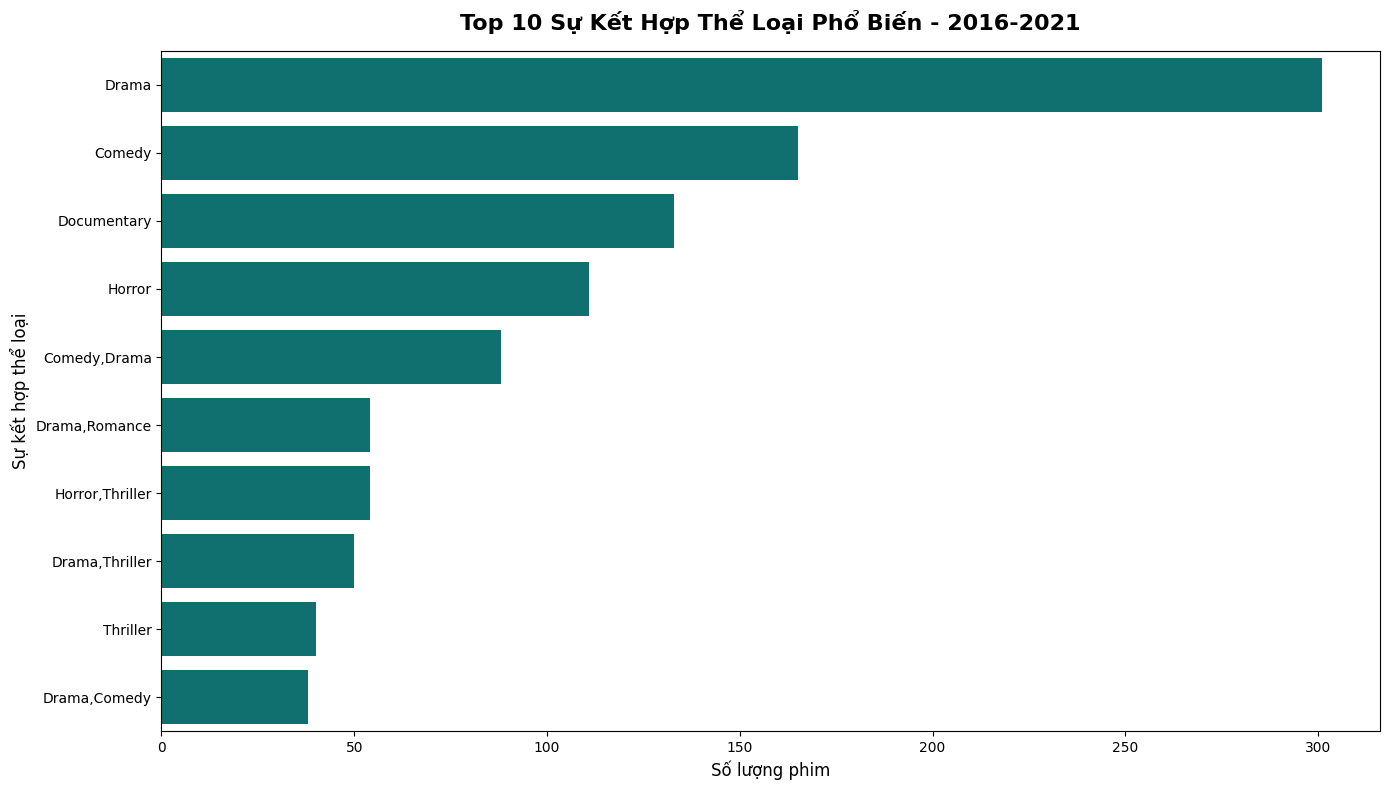

In [43]:
def analyze_genre_combinations(df, period_name, top_n=10):
    genre_combinations = df['genres'].value_counts().head(top_n)
    
    print(f"Top {top_n} sự kết hợp thể loại phổ biến:")
    for idx, (combination, count) in enumerate(genre_combinations.items(), 1):
        percentage = (count / len(df)) * 100
        clean_combo = str(combination).strip()
        print(f"{idx:2d}. {clean_combo:40s}: {count:4d} ({percentage:5.2f}%)")
    
    # Vẽ biểu đồ
    plt.figure(figsize=(14, 8))
    labels = [str(g)[:50] + '...' if len(str(g)) > 50 else str(g) for g in genre_combinations.index]
    
    sns.barplot(x=genre_combinations.values, y=labels, orient='h', color='teal')
    plt.title(f'Top {top_n} Sự Kết Hợp Thể Loại Phổ Biến - {period_name}', 
              fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Số lượng phim', fontsize=12)
    plt.ylabel('Sự kết hợp thể loại', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return genre_combinations

combo_period1 = analyze_genre_combinations(df_year_1, "2000-2005", top_n=10)
combo_period2 = analyze_genre_combinations(df_year_2, "2016-2021", top_n=10)


### **Câu hỏi 4: Mối tương quan giữa các đặc trưng (features) của top các thể loại phổ biến là gì?**

Top 5 sự kết hợp thể loại được chọn:
1. Drama (464 phim)
2. Comedy (267 phim)
3. Documentary (172 phim)
4. Horror (168 phim)
5. Comedy,Drama (138 phim)

Thống kê mean theo từng thể loại:
----------------------------------------------------------------------
               Runtime  Rating  Votes  Revenue
Genre_Comb                                    
Comedy           94.20    5.45  65.06     1.69
Comedy, Drama    96.77    5.94  72.53     1.13
Documentary      88.26    6.66  33.73     0.41
Drama            98.88    5.90  55.48     0.75
Horror           88.17    4.67  43.99     0.58


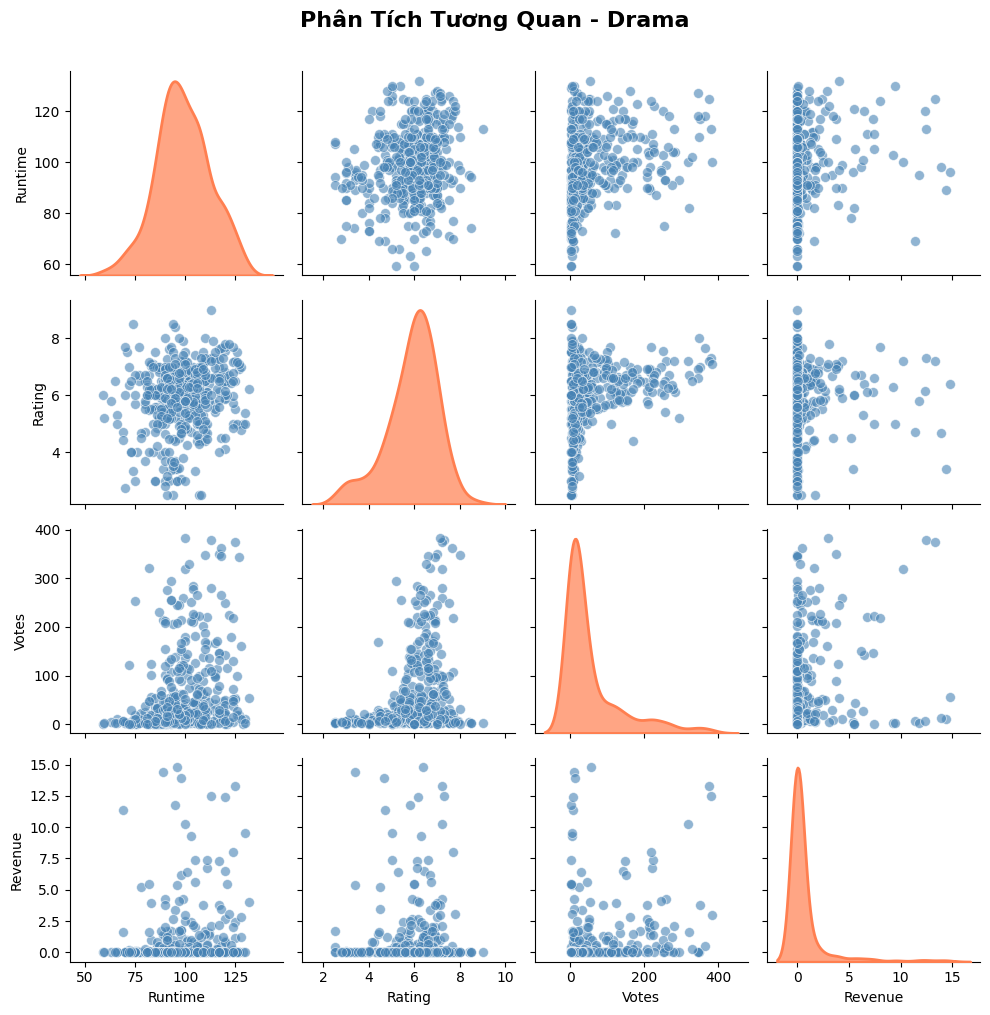

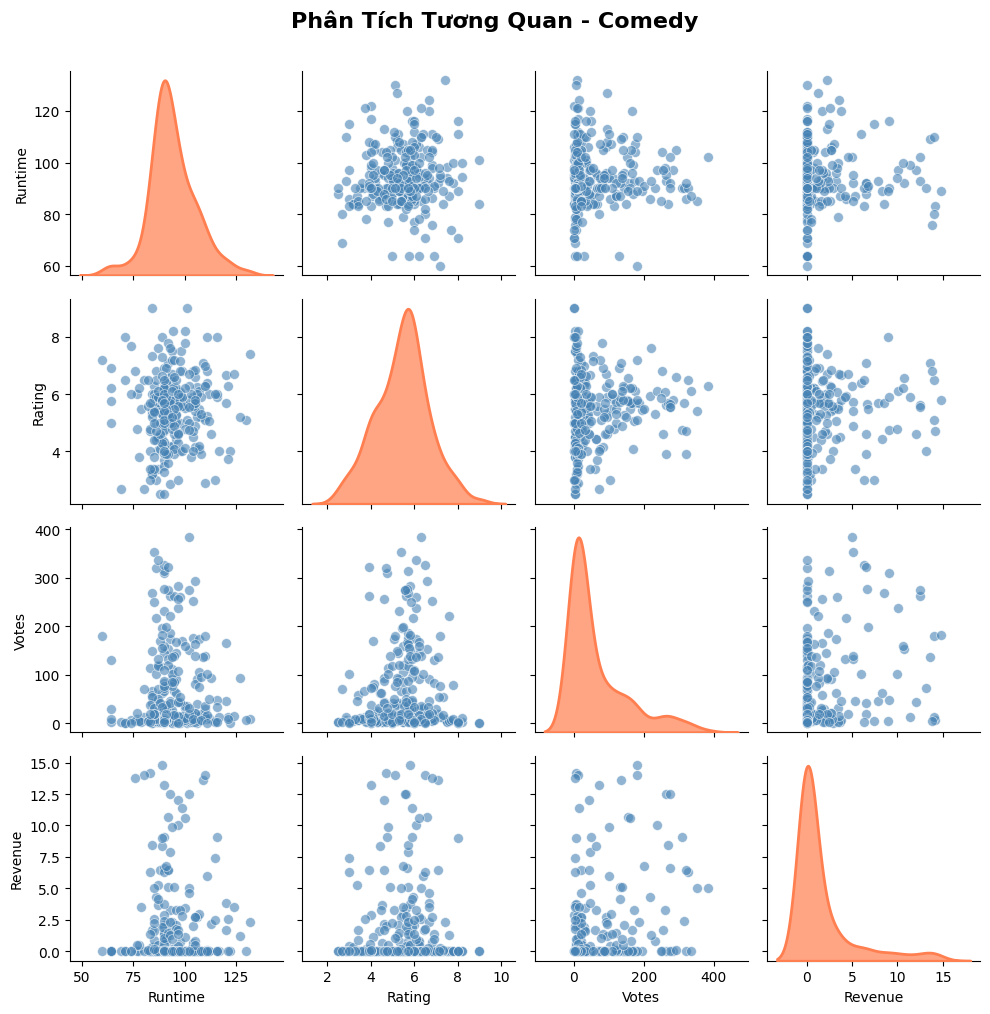

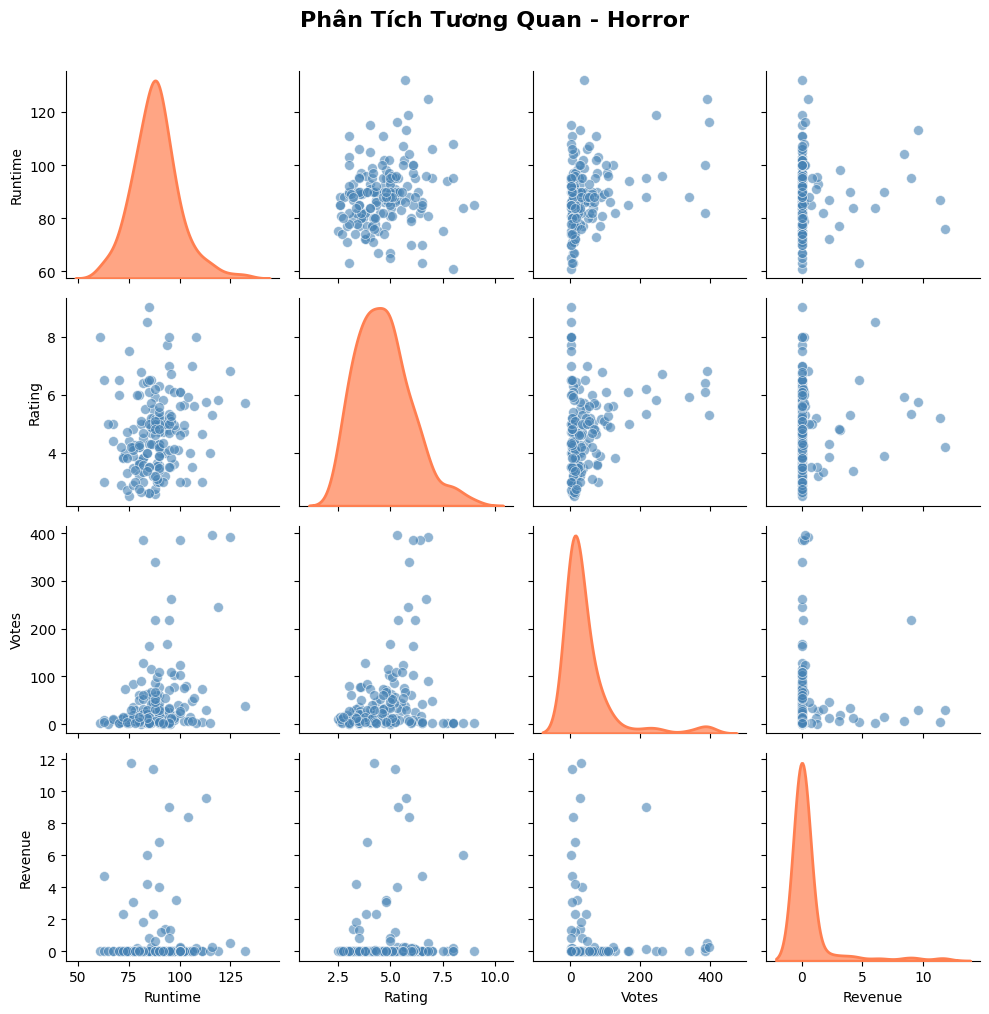

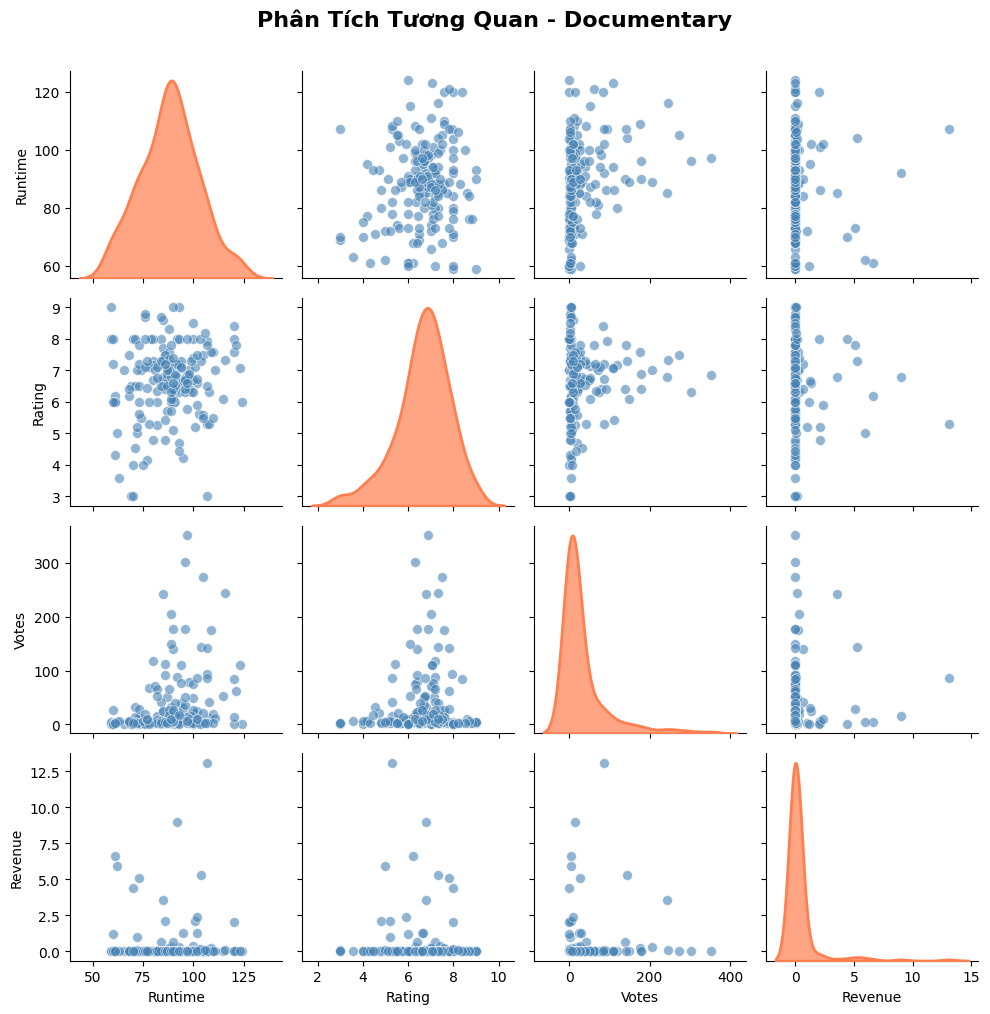

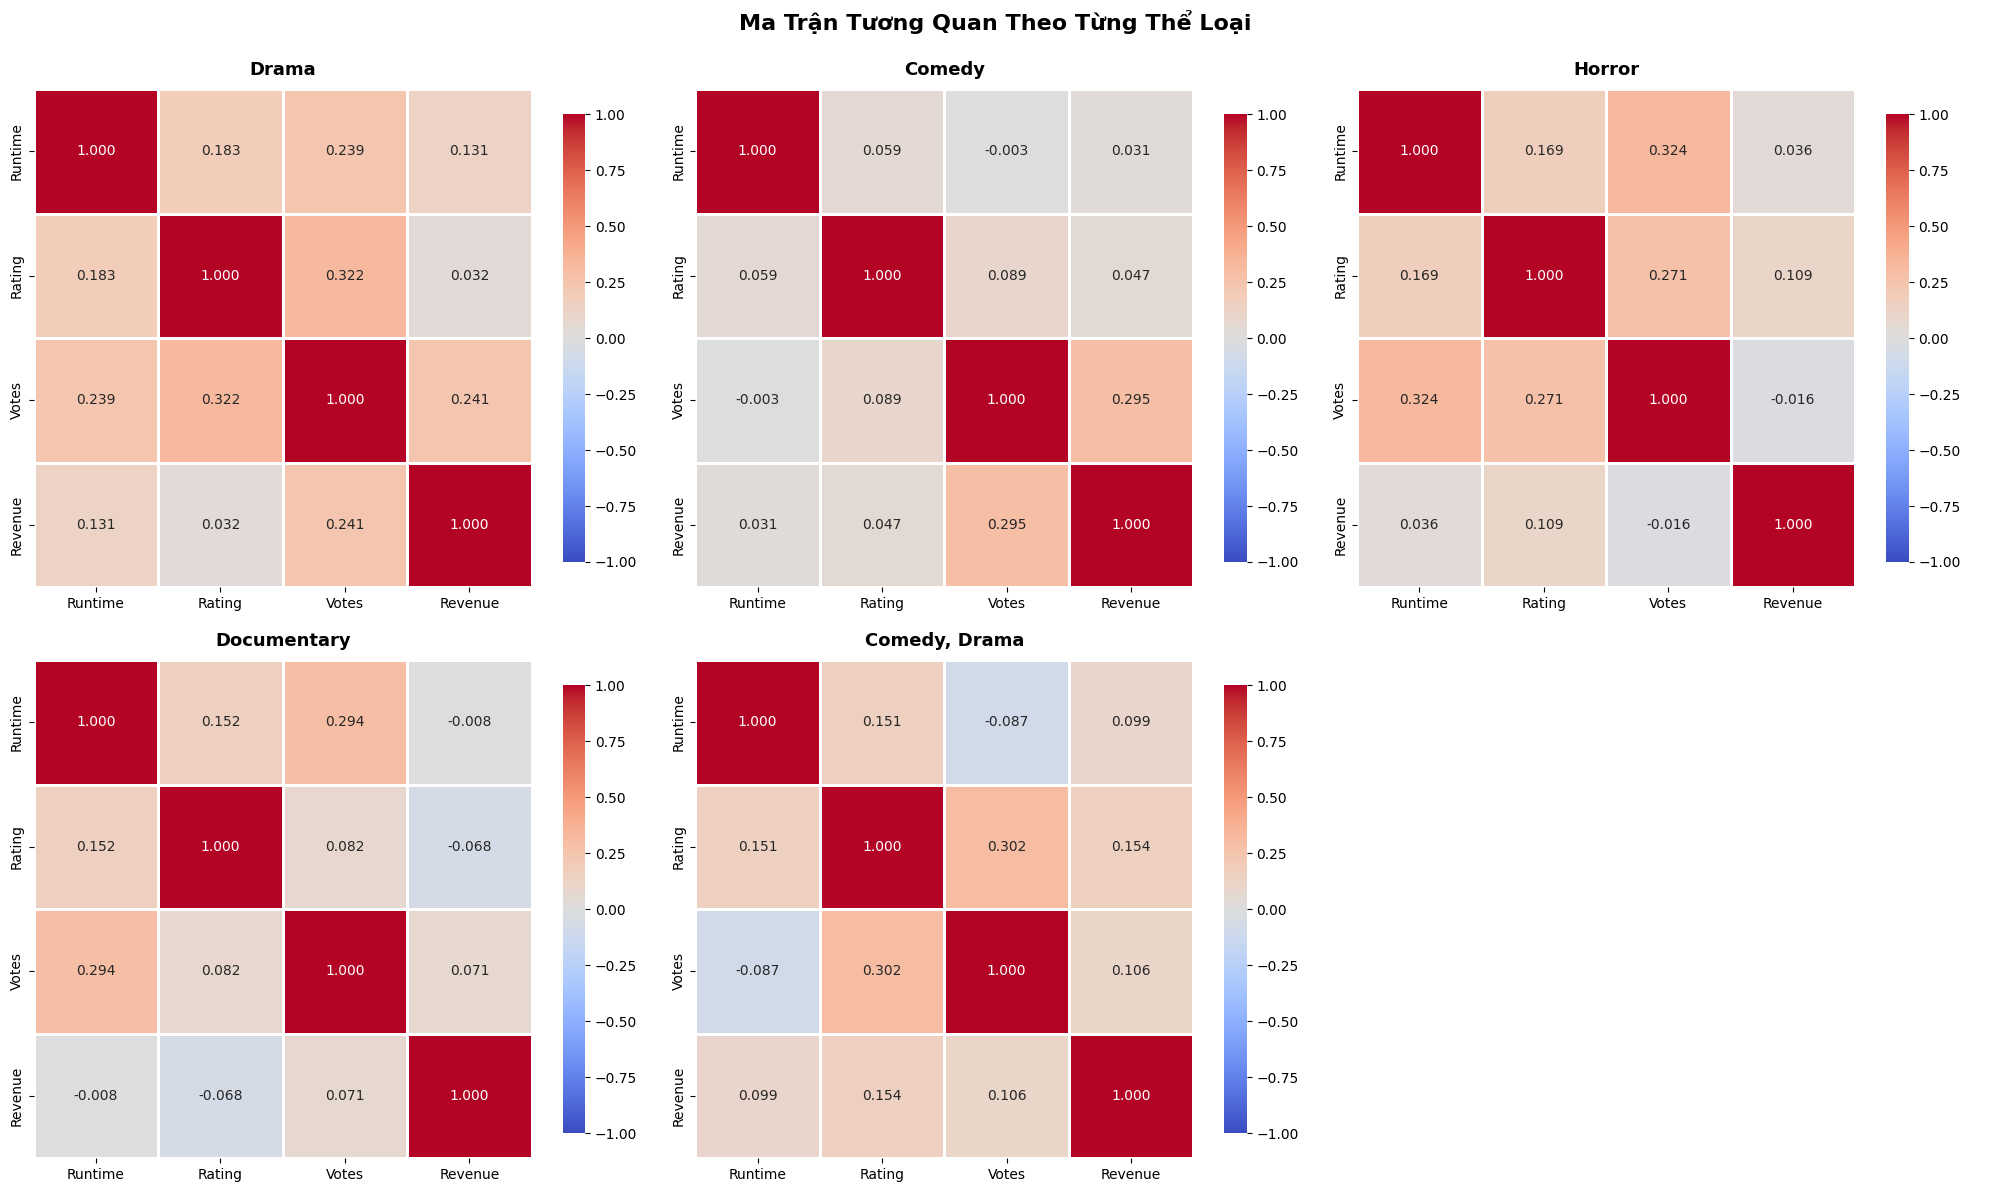

In [44]:
def get_top_genre_combinations(df, top_n=5):
    """
    Lấy top N sự kết hợp thể loại phổ biến nhất.
    """
    genre_combos = df['genres'].value_counts().head(top_n)
    return genre_combos.index.tolist()


def create_genre_correlation_data(df, top_genres):
    """
    Tạo DataFrame với cột genre_comb và các features số để phân tích tương quan.
    """
    df_filtered = df[df['genres'].isin(top_genres)].copy()
    genre_mapping = {}
    for idx, genre in enumerate(top_genres, 1):
        # Lấy 2-3 thể loại đầu tiên nếu quá dài
        parts = str(genre).split(',')[:3]
        short_name = ', '.join([p.strip() for p in parts])
        if len(short_name) > 30:
            short_name = short_name[:27]
        genre_mapping[genre] = short_name
    
    df_filtered['Genre_Comb'] = df_filtered['genres'].map(genre_mapping)
    
    # Chọn các cột features quan trọng
    analysis_df = df_filtered[['Genre_Comb', 'runtime', 'vote_average', 'vote_count', 'revenue']].copy()
    analysis_df = analysis_df.rename(columns={
        'runtime': 'Runtime',
        'vote_average': 'Rating',
        'vote_count': 'Votes',
        'revenue': 'Revenue'
    })
    
    # Chuyển revenue sang đơn vị triệu
    analysis_df['Revenue'] = analysis_df['Revenue'] / 1_000_000
    
    return analysis_df


def plot_genre_correlation_matrix(df):
    """
    Vẽ scatter plot matrix (pairplot) để xem mối tương quan giữa các features.
    """
    # Tạo pairplot với legend bên ngoài
    g = sns.pairplot(
        df, 
        hue='Genre_Comb',
        diag_kind='kde',
        plot_kws={'alpha': 0.6, 's': 50},
        diag_kws={'alpha': 0.7, 'linewidth': 2},
        corner=False,
        palette='Set2'
    )
    
    g.fig.suptitle(f'Top 5 Thể Loại', 
                   fontsize=16, fontweight='bold', y=1.01)
    
    # Di chuyển legend ra ngoài bên phải
    handles = g._legend_data.values()
    labels = g._legend_data.keys()
    g._legend.remove()
    g.fig.legend(
        handles, labels,
        loc='center left',
        bbox_to_anchor=(1.0, 0.5),
        fontsize=10,
        title='Thể loại',
        title_fontsize=11,
        frameon=True,
        shadow=True,
        fancybox=True
    )
    
    plt.subplots_adjust(right=0.85)
    plt.show()


def plot_genre_pairplots(df):
    """
    Vẽ 4 pairplot riêng biệt cho 4 thể loại đầu trong top 5.
    """
    genres = df['Genre_Comb'].unique()[:4]  # Lấy 4 thể loại đầu
    
    for genre in genres:
        genre_data = df[df['Genre_Comb'] == genre][['Runtime', 'Rating', 'Votes', 'Revenue']].copy()
        
        # Vẽ pairplot cho từng thể loại
        g = sns.pairplot(
            genre_data,
            diag_kind='kde',
            plot_kws={'alpha': 0.6, 's': 50, 'color': 'steelblue'},
            diag_kws={'alpha': 0.7, 'linewidth': 2, 'color': 'coral'},
            corner=False
        )
        
        g.fig.suptitle(f'Phân Tích Tương Quan - {genre}', 
                       fontsize=16, fontweight='bold', y=1.01)
        
        plt.tight_layout()
        plt.show()


def plot_correlation_heatmaps(df):
    """
    Vẽ 5 heatmap ma trận tương quan cho từng thể loại (top 5).
    """
    genres = df['Genre_Comb'].unique()[:5]  # Lấy top 5 thể loại
    
    # Tạo layout 2x3 (6 subplots) để có thể chứa 5 heatmaps
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for idx, genre in enumerate(genres):
        genre_data = df[df['Genre_Comb'] == genre][['Runtime', 'Rating', 'Votes', 'Revenue']]
        corr_matrix = genre_data.corr()
        
        sns.heatmap(
            corr_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm',
            center=0,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=1,
            cbar_kws={'shrink': 0.8},
            ax=axes[idx]
        )
        
        axes[idx].set_title(f'{genre}', fontsize=13, fontweight='bold', pad=10)
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('')

    axes[5].axis('off')
    
    plt.suptitle('Ma Trận Tương Quan Theo Từng Thể Loại', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()


def analyze_genre_correlations(df, top_n=5):    
    # Lấy top thể loại
    top_genres = get_top_genre_combinations(df, top_n)
    
    print(f"Top {top_n} sự kết hợp thể loại được chọn:")
    for idx, genre in enumerate(top_genres, 1):
        count = len(df[df['genres'] == genre])
        print(f"{idx}. {genre[:60]} ({count} phim)")
    
    # Tạo data để phân tích
    analysis_df = create_genre_correlation_data(df, top_genres)
    
    # Hiển thị thống kê cơ bản
    print(f"\nThống kê mean theo từng thể loại:")
    print("-" * 70)
    summary = analysis_df.groupby('Genre_Comb')[['Runtime', 'Rating', 'Votes', 'Revenue']].mean()
    print(summary.round(2))
    
    # Vẽ 4 pairplot riêng cho 4 thể loại đầu
    plot_genre_pairplots(analysis_df)
    
    # Vẽ heatmaps cho 5 thể loại
    plot_correlation_heatmaps(analysis_df)


# Phân tích cho toàn bộ data
analyze_genre_correlations(cleaned_train_df, top_n=5)


**Nhận xét**
* Drama
* Comedy
* Horror
* Documentary
* Comedy, Drama

### **Câu hỏi 5: Điểm Rating so với Tổng số phim đã đạo diễn của mỗi đạo diễn là bao nhiêu? Có mối tương quan nào giữa chúng không?**


In [45]:
# Explode directors thành nhiều hàng
def explode_directors(df):
    """
    Tách cột directors thành nhiều hàng, mỗi đạo diễn một hàng.
    """
    df_exploded = df.copy()
    
    # Chuẩn hóa cột directors thành list
    df_exploded['directors_list'] = normalize_multilabel_series(df_exploded['directors'])
    
    # Explode để tách từng đạo diễn ra
    df_exploded = df_exploded.explode('directors_list')
    
    # Loại bỏ các hàng không có đạo diễn
    df_exploded = df_exploded[df_exploded['directors_list'].notna()]
    df_exploded = df_exploded[df_exploded['directors_list'] != '']
    
    # Đổi tên cột để dễ sử dụng: cột director 
    df_exploded['director'] = df_exploded['directors_list']
    df_exploded = df_exploded.drop('directors_list', axis=1)
    
    return df_exploded

df_directors_exploded = explode_directors(cleaned_train_df)

print(f"Số hàng ban đầu: {len(cleaned_train_df)}")
print(f"Số hàng sau khi explode: {len(df_directors_exploded)}")
print(f"Số đạo diễn unique: {df_directors_exploded['director'].nunique()}")
df_directors_exploded[['title', 'director', 'vote_average']].head(10)


Số hàng ban đầu: 3975
Số hàng sau khi explode: 4380
Số đạo diễn unique: 3864


title                  director  vote_average
1         Turkish Ice Cream                 Can Ulkay         5.900
2                The Keeper                Paul Lynch         4.375
7           Roxanne Roxanne           Michael Larnell         6.000
10      My Brother's Keeper                  JP Siili         4.313
12          Say It Isn't So               J.B. Rogers         4.700
13            Class Reunion               René Vilbre         6.000
17        Valley of Shadows  Jonas Matzow Gulbrandsen         6.458
18  A Janela (Maryalva Mix)                Edgar Pêra         5.900
20                Astro Kid                Eric Tosti         7.200
24               Never Here            Camille Thoman         4.909

In [46]:
df_rate_dir = df_directors_exploded.groupby('director', as_index=False)['vote_average'].agg({'Average rating':'mean', 'Count':'count'})
df_rate_dir[df_rate_dir['Count'] >= 2]

C:\Users\MSI\AppData\Local\Temp\ipykernel_15128\2064239728.py:1: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  df_rate_dir = df_directors_exploded.groupby('director', as_index=False)['vote_average'].agg({'Average rating':'mean', 'Count':'count'})


director  Average rating  Count
1        Aaron B. Koontz        5.373000      2
6           Aaron Mirtes        4.050000      2
22            Adam Green        5.588000      2
40            Adrian Teh        6.000000      2
47    Agustín Díaz Yanes        5.550000      2
...                  ...             ...    ...
3823       Yves Simoneau        6.226000      2
3832      Zaida Bergroth        6.000000      2
3836         Zhang Yimou        7.077500      2
3844  Álex de la Iglesia        6.477667      3
3851    Émile Gaudreault        5.625500      2

[379 rows x 3 columns]

r^2 = 0.002


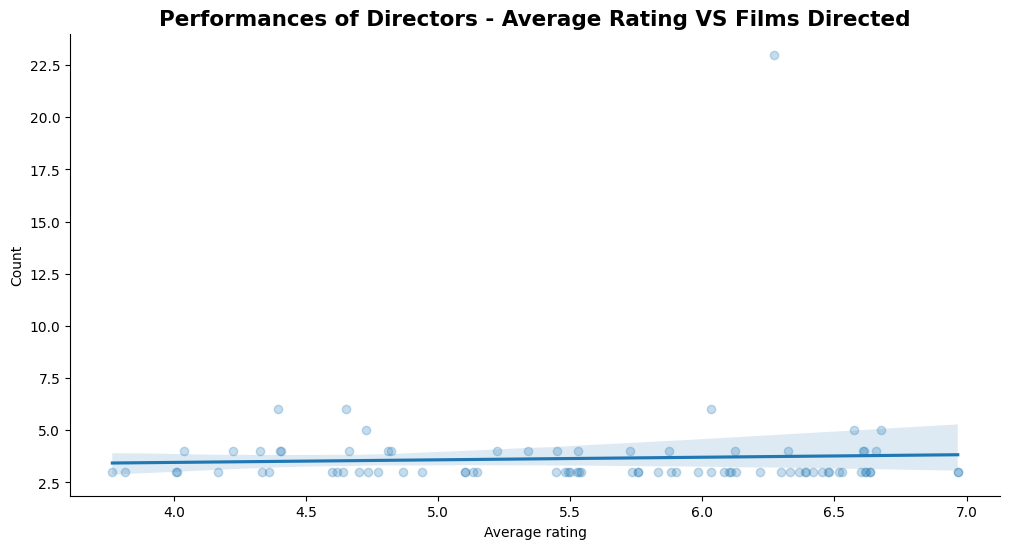

In [47]:
# Chỉ lấy những đạo diễn có từ 3 phim trở lên
df_rate_dir = df_rate_dir[df_rate_dir['Count'] >= 3]

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

x=df_rate_dir['Average rating']
y=df_rate_dir['Count']

# plot data
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.25})
ax.set_title('Performances of Directors - Average Rating VS Films Directed', fontsize=15.5, fontweight ='heavy')

# compute r^2 value
lin_reg = LinearRegression().fit(df_rate_dir[['Average rating']],y)
r2 = lin_reg.score(df_rate_dir[['Average rating']],y)

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

Nhận xét: không có mối tương quan giữa rating và số lượng phim của đạo diễn

### **Câu hỏi 6: Tỷ suất lợi nhuận (ROI = Revenue / Budget) ảnh hưởng thế nào đến Rating?**

In [48]:
# Lọc ra những phim có revenue và budget khác 0
df_roi = cleaned_train_df[(cleaned_train_df['revenue'] > 0) & (cleaned_train_df['budget'] > 0)].copy()

df_roi['ROI'] = df_roi['revenue'] / df_roi['budget']


print(f"Số lượng phim có đủ dữ liệu ROI: {len(df_roi)}")
print(f"\nThống kê ROI:")
print(df_roi['ROI'].describe())
print(f"\nThống kê Rating:")
print(df_roi['vote_average'].describe())

Số lượng phim có đủ dữ liệu ROI: 1461

Thống kê ROI:
count    1.461000e+03
mean     6.100545e+03
std      1.228433e+05
min      1.754386e-06
25%      5.726333e-02
50%      3.513514e-01
75%      1.300733e+00
max      3.700000e+06
Name: ROI, dtype: float64

Thống kê Rating:
count    1461.000000
mean        5.827545
std         1.045977
min         2.500000
25%         5.202000
50%         5.900000
75%         6.500000
max         9.000000
Name: vote_average, dtype: float64


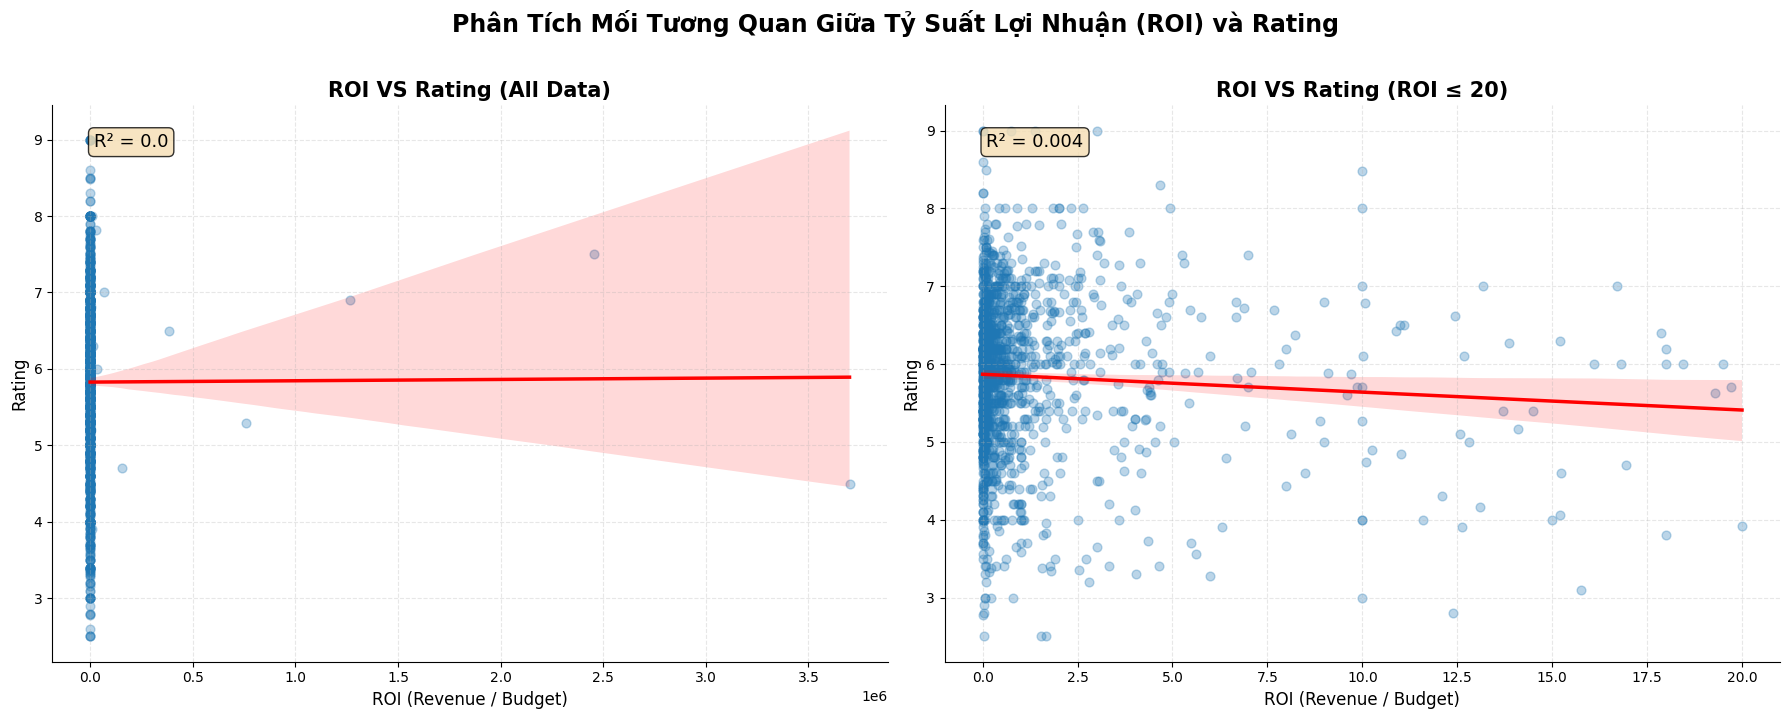


Kết quả phân tích tương quan:
R² (toàn bộ data) = 0.0
R² (ROI ≤ 20) = 0.004
Số lượng phim (toàn bộ): 1461
Số lượng phim (ROI ≤ 20): 1395


In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Subplot 1: Scatter plot với regression line (toàn bộ data)
x = df_roi['ROI']
y = df_roi['vote_average']

sns.regplot(x=x, y=y, ax=ax1, scatter_kws={'alpha': 0.3, 's': 40}, line_kws={'color': 'red', 'linewidth': 2.5})
ax1.set_title('ROI VS Rating (All Data)', fontsize=15, fontweight='bold')
ax1.set_xlabel('ROI (Revenue / Budget)', fontsize=12)
ax1.set_ylabel('Rating', fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')

# Tính r² value
lin_reg = LinearRegression().fit(x.values.reshape(-1, 1), y)
r2 = lin_reg.score(x.values.reshape(-1, 1), y)
ax1.text(0.05, 0.95, f'R² = {round(r2, 4)}', transform=ax1.transAxes, 
         fontsize=13, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Subplot 2: Scatter plot với ROI giới hạn (loại bỏ outliers cực cao)
# Lọc ROI < 20 để nhìn rõ hơn phần đông dữ liệu
df_roi_filtered = df_roi[df_roi['ROI'] <= 20]
x_filtered = df_roi_filtered['ROI']
y_filtered = df_roi_filtered['vote_average']

sns.regplot(x=x_filtered, y=y_filtered, ax=ax2, 
           scatter_kws={'alpha': 0.3, 's': 40}, line_kws={'color': 'red', 'linewidth': 2.5})
ax2.set_title('ROI VS Rating (ROI ≤ 20)', fontsize=15, fontweight='bold')
ax2.set_xlabel('ROI (Revenue / Budget)', fontsize=12)
ax2.set_ylabel('Rating', fontsize=12)
ax2.grid(True, alpha=0.3, linestyle='--')

# Tính r² value cho filtered data
lin_reg_filtered = LinearRegression().fit(x_filtered.values.reshape(-1, 1), y_filtered)
r2_filtered = lin_reg_filtered.score(x_filtered.values.reshape(-1, 1), y_filtered)
ax2.text(0.05, 0.95, f'R² = {round(r2_filtered, 4)}', transform=ax2.transAxes, 
         fontsize=13, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Phân Tích Mối Tương Quan Giữa Tỷ Suất Lợi Nhuận (ROI) và Rating', 
             fontsize=17, fontweight='bold', y=1.02)

sns.despine()
plt.tight_layout()
plt.show()

print(f"\nKết quả phân tích tương quan:")
print(f"R² (toàn bộ data) = {round(r2, 4)}")
print(f"R² (ROI ≤ 20) = {round(r2_filtered, 4)}")
print(f"Số lượng phim (toàn bộ): {len(df_roi)}")
print(f"Số lượng phim (ROI ≤ 20): {len(df_roi_filtered)}")